In [1]:
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.modeling import models
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table
import astropy.constants as c
from extinction import apply
import extinction

In [2]:
# SED builder from catalogs:
# use 

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/w51/crowdsource_nsky0_merged_photometry_tables_merged_11matches.fits')

In [4]:
def get_band_names(cat):
    return [colname[-5:] for colname in cat.colnames if colname.startswith('qf_')]

In [5]:
def get_mags(cat):
    return [cat[f'mag_ab_{band}'].value[0] for band in get_band_names(cat)][::-1]

In [6]:
def get_jy(cat):
    #return ([cat[f'flux_jy_{band}'].value[0] for band in get_band_names(cat)][::-1])
    return ([cat[f'flux_jy_{band}'] for band in get_band_names(cat)][::-1])

In [7]:
wavelengths = [
1.50,
1.82,
1.87,
2.10,
2.12,
3.00,
3.60,
4.05,
4.10,
4.66,
4.80, 
#7.70,
#12.80,
#25.50
]

In [8]:
src = cat[(np.int32(cat['x_f480m']) == 3362) & (np.int32(cat['y_f480m']) == 1083)]
src = cat[cat['id_f480m'] == 30730]
src = cat[100007]

In [9]:
freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src)*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

Text(0.5, 0, 'Wavelength (microns)')

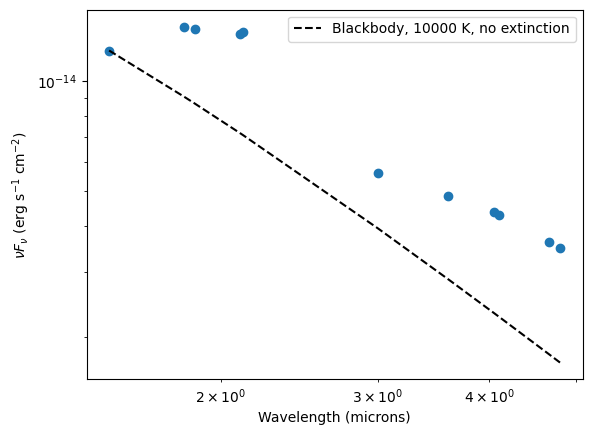

In [10]:
#fig = plt.figure(figsize=(12, 9))
plt.scatter(wavelengths, nuFnu)
T = 10000 * u.K
A_V = 10
SED = nuFnu
if True:
    bb = models.BlackBody(temperature=T)
    BB_SED = bb(wavelengths * u.um).to(u.MJy/u.sr)
    #if A_V is not None:
        # Convert wavelengths to Angstroms for the extinction function
    wavelengths_angstrom = (wavelengths * u.um).to(u.AA).value
    # Use the Fitzpatrick (1999) extinction curve
    R_V = 3.1
    #BB_SED_extincted = apply(extinction.fitzpatrick99(wavelengths_angstrom, A_V, R_V), BB_SED.value)
    normalization_factor =  SED[0]/BB_SED[0]
    #plt.plot(wavelengths, BB_SED_extincted * normalization_factor, linestyle='--', color='r', label=f'Blackbody with A_V = {A_V}')
    plt.plot(wavelengths, BB_SED * normalization_factor, linestyle = '--', color = 'k', label = f'Blackbody, {round(T.value)} K, no extinction')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [11]:
cat_cut = cat[:1000]

In [12]:
from scipy.stats import powerlaw

In [14]:
image_filenames ={
    "f150w": "/orange/adamginsburg/jwst/sgrb2/NB/F150W/pipeline/jw05365-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    # do not use reprojected data as it does not account for the pixel size change (the flux is off by a factor of pixel area ratio)
    "f182m": "/orange/adamginsburg/jwst/sgrb2/NB/F182M/pipeline/jw05365-o001_t001_nircam_clear-f182m-merged_i2d.fits", 
    "f187n": "/orange/adamginsburg/jwst/sgrb2/NB/F187N/pipeline/jw05365-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/sgrb2/NB/F210M/pipeline/jw05365-o001_t001_nircam_clear-f210m-merged_i2d.fits", 
    "f212n": "/orange/adamginsburg/jwst/sgrb2/NB/F212N/pipeline/jw05365-o001_t001_nircam_clear-f212n-merged_i2d.fits", 
    "f300m": "/orange/adamginsburg/jwst/sgrb2/NB/F300M/pipeline/jw05365-o001_t001_nircam_clear-f300m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/sgrb2/NB/F360M/pipeline/jw05365-o001_t001_nircam_clear-f360m-merged_i2d.fits", 
    "f405n": "/orange/adamginsburg/jwst/sgrb2/NB/F405N/pipeline/jw05365-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/sgrb2/NB/F410M/pipeline/jw05365-o001_t001_nircam_clear-f410m-merged_i2d.fits", 
    "f466n": "/orange/adamginsburg/jwst/sgrb2/NB/F466N/pipeline/jw05365-o001_t001_nircam_clear-f466n-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/sgrb2/NB/F480M/pipeline/jw05365-o001_t001_nircam_clear-f480m-merged_i2d.fits", 
    "f770w": "/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o002_t002_miri_f770w/jw05365-o002_t002_miri_f770w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o002_t002_miri_f1280w/jw05365-o002_t002_miri_f1280w_i2d.fits",
    "f2550w": "/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o002_t002_miri_f2550w/jw05365-o002_t002_miri_f2550w_i2d.fits",
}

In [15]:
image_filenames_reprojected={
    "f150w": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f150w-merged_i2d_pipeline_v0.1_reprj_f466.fits",
    "f182m": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f182m-merged_i2d_pipeline_v0.1_reprj_f466.fits", 
    "f187n": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f187n-merged_i2d_pipeline_v0.1_reprj_f466.fits", 
    "f210m": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f210m-merged_i2d_pipeline_v0.1_reprj_f466.fits", 
    "f212n": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f212n-merged_i2d_pipeline_v0.1_reprj_f466.fits", 
    "f300m": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f300m-merged_i2d_pipeline_v0.1_reprj_f466.fits",
    "f360m": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f360m-merged_i2d_pipeline_v0.1_reprj_f466.fits", 
    "f405n": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f405n-merged_i2d_pipeline_v0.1_reprj_f466.fits",
    "f410m": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f410m-merged_i2d_pipeline_v0.1_reprj_f466.fits", 
    "f466n": "/orange/adamginsburg/jwst/sgrb2/NB/F466N/pipeline/jw05365-o001_t001_nircam_clear-f466n-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o001_t001_nircam_clear-f480m-merged_i2d_pipeline_v0.1_reprj_f466.fits", 
    "f770w": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o002_t002_miri_f770w_i2d_pipeline_v0.1_reprj_f466.fits",
    "f1280w": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o002_t002_miri_f1280w_i2d_pipeline_v0.1_reprj_f466.fits",
    "f2550w": "/orange/adamginsburg/jwst/sgrb2/NB/data_reprojected/jw05365-o002_t002_miri_f2550w_i2d_pipeline_v0.1_reprj_f466.fits",
}

In [16]:
# F150W = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_clear-f150w/jw05365-o001_t001_nircam_clear-f150w_i2d.fits')
# F182M = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_clear-f182m/jw05365-o001_t001_nircam_clear-f182m_i2d.fits')
# F187N = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_clear-f187n/jw05365-o001_t001_nircam_clear-f187n_i2d.fits')
# F210M = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_clear-f210m/jw05365-o001_t001_nircam_clear-f210m_i2d.fits')
# F212N = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_clear-f212n/jw05365-o001_t001_nircam_clear-f212n_i2d.fits')
# F300M = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_clear-f300m/jw05365-o001_t001_nircam_clear-f300m_i2d.fits')
# F360M = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_clear-f360m/jw05365-o001_t001_nircam_clear-f360m_i2d.fits')
# F405N = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_f405n-f444w/jw05365-o001_t001_nircam_f405n-f444w_i2d.fits')
# F410M = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_clear-f410m/jw05365-o001_t001_nircam_clear-f410m_i2d.fits')
# F466N = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_f444w-f466n/jw05365-o001_t001_nircam_f444w-f466n_i2d.fits')
# F480M = fits.open('/orange/adamginsburg/jwst/sgrb2/mastDownload/JWST/jw05365-o001_t001_nircam_clear-f480m/jw05365-o001_t001_nircam_clear-f480m_i2d.fits')

F150W = fits.open(image_filenames["f150w"])
F182M = fits.open(image_filenames["f182m"])
F187N = fits.open(image_filenames["f187n"])
F210M = fits.open(image_filenames["f210m"])
F212N = fits.open(image_filenames["f212n"])
F300M = fits.open(image_filenames["f300m"])
F360M = fits.open(image_filenames["f360m"])
F405N = fits.open(image_filenames["f405n"])
F410M = fits.open(image_filenames["f410m"])
F466N = fits.open(image_filenames["f466n"])
F480M = fits.open(image_filenames["f480m"])
F770W = fits.open(image_filenames["f770w"])
F1280W = fits.open(image_filenames["f1280w"])
F2550W = fits.open(image_filenames["f2550w"])

F150W_r = fits.open(image_filenames_reprojected["f150w"])
F182M_r = fits.open(image_filenames_reprojected["f182m"])
F187N_r = fits.open(image_filenames_reprojected["f187n"])
F210M_r = fits.open(image_filenames_reprojected["f210m"])
F212N_r = fits.open(image_filenames_reprojected["f212n"])
F300M_r = fits.open(image_filenames_reprojected["f300m"])
F360M_r = fits.open(image_filenames_reprojected["f360m"])
F405N_r = fits.open(image_filenames_reprojected["f405n"])
F410M_r = fits.open(image_filenames_reprojected["f410m"])
F466N_r = fits.open(image_filenames_reprojected["f466n"])
F480M_r = fits.open(image_filenames_reprojected["f480m"])
F770W_r = fits.open(image_filenames_reprojected["f770w"])
F1280W_r = fits.open(image_filenames_reprojected["f1280w"])
F2550W_r = fits.open(image_filenames_reprojected["f2550w"])

In [17]:
F150data = F150W['SCI'].data
F182data = F182M['SCI'].data
F187data = F187N['SCI'].data
F210data = F210M['SCI'].data
F212data = F212N['SCI'].data
F300data = F300M['SCI'].data
F360data = F360M['SCI'].data
F405data = F405N['SCI'].data
F410data = F410M['SCI'].data
F466data = F466N['SCI'].data
F480data = F480M['SCI'].data
F770data = F770W['SCI'].data
F1280data = F1280W['SCI'].data
F2550data = F2550W['SCI'].data

F150data_r = F150W_r['SCI'].data
F182data_r = F182M_r['SCI'].data
F187data_r = F187N_r['SCI'].data
F210data_r = F210M_r['SCI'].data
F212data_r = F212N_r['SCI'].data
F300data_r = F300M_r['SCI'].data
F360data_r = F360M_r['SCI'].data
F405data_r = F405N_r['SCI'].data
F410data_r = F410M_r['SCI'].data
F466data_r = F466N_r['SCI'].data
F480data_r = F480M_r['SCI'].data
F770data_r = F770W_r['SCI'].data
F1280data_r = F1280W_r['SCI'].data
F2550data_r = F2550W_r['SCI'].data


In [18]:
lower_limits = [
1.5, # F150W
2.5, # F182M
3.5, # F187N
3.5, # F210M
4.5, # F212N
1.5, # F300M
2.7, # F360M
5.0, # F405N
4.0, # F410M
4.0, # F466N
4.3, # F480M
45,
80,
900
]

In [19]:
hdul_list = [F150W, F182M, F187N, F210M, F212N, F300M, F360M, F405N, F410M, F466N, F480M, F770W, F1280W, F2550W]
hdul_list_r = [F150W_r, F182M_r, F187N_r, F210M_r, F212N_r, F300M_r, F360M_r, F405N_r, F410M_r, F466N_r, F480M_r, F770W_r, F1280W_r, F2550W_r]

In [20]:
def get_SED(x,y, reference_hdul, hdul_list_):
    wcs_in = WCS(reference_hdul['SCI'].header)
    wcs_coord = SkyCoord(*wcs_in.wcs_pix2world(x,y,0), frame = wcs_in.wcs.radesys.lower(), unit=(u.deg,u.deg))
    
    fluxes = []
    
    for hdul_ in hdul_list_:
        wcs_second = WCS(hdul_['SCI'].header)
        pix_coords = wcs_second.world_to_pixel(wcs_coord)
        flux = hdul_['SCI'].data[int(np.round(pix_coords[1])),int(np.round(pix_coords[0]))]
        fluxes += [flux]
    
    return fluxes

In [21]:
import matplotlib.pyplot as plt
import warnings
from astropy.wcs import FITSFixedWarning

In [22]:
def generate_image_data(x,y,hdul,delta_wcs = 1.2*u.arcsec):

    delta_pix = delta_wcs.to(u.deg).value / np.abs(hdul['SCI'].header['CDELT1'])

# Suppress FITSFixedWarning from astropy.wcs
    warnings.simplefilter('ignore', FITSFixedWarning)
    data = []
    wcs_original = WCS(hdul['SCI'].header)
    wcs_coord = SkyCoord(*wcs_original.wcs_pix2world(x,y,0), frame = wcs_original.wcs.radesys.lower(), unit=(u.deg,u.deg))
    
    for hdul_ in hdul_list:
        wcs_in = WCS(hdul_['SCI'].header)
        #wcs_coord = SkyCoord(*wcs_in.wcs_pix2world(x,y,0), frame = wcs_in.wcs.radesys.lower(), unit=(u.deg,u.deg))
        pix_coords = wcs_in.world_to_pixel(wcs_coord)
        data += [hdul_['SCI'].data[int(np.round(pix_coords[1])-delta_pix):int(np.round(pix_coords[1])+delta_pix),int(np.round(pix_coords[0])-delta_pix):int(np.round(pix_coords[0])+delta_pix)]]
    return data

In [23]:
# color SED based on the filter width

In [24]:
from matplotlib.colors import LogNorm

In [25]:
def plot_image(ax, data, vmin):
    vmax = data[len(data)//2, len(data)//2]
    if np.isnan(vmax):
        vmax = np.nanmax(data)
    ax.imshow(data, origin='lower', norm=LogNorm(vmin, vmax=vmax))
    ax.axis('off')  # Hide the axis
    return ax

In [26]:
def create_SED_plot(x,y, reference_hdul, hdul_list_, plot_blackbody = True, A_V = 10, T = 10000*u.K):
    SED = get_SED(x,y, reference_hdul, hdul_list)
    SED_r = get_SED(x,y, reference_hdul, hdul_list_r)
    image_data = generate_image_data(x,y, reference_hdul)
    fig = plt.figure(figsize=(12, 9))
    gs = GridSpec(6, 9, figure=fig)


    ax_sed = fig.add_subplot(gs[1:6, 0:8])
    ax_sed.scatter(wavelengths, SED, marker='o', label = 'data, central pixel')
    #ax_sed.scatter(wavelengths, SED_r, marker='x', label = 'data, reprojected')
    ax_sed.scatter(wavelengths, lower_limits, marker = '^', label = 'sensitivity limit')
    ax_sed.set_xlabel(r'Wavelength, $\mu$m')
    ax_sed.set_ylabel('Flux (MJy/sr)')
    ax_sed.set_title('SED')
    ax_sed.set_xlim(1, 30)
    if plot_blackbody:
        bb = models.BlackBody(temperature=T)
        BB_SED = bb(wavelengths * u.um).to(u.MJy/u.sr)
        #if A_V is not None:
            # Convert wavelengths to Angstroms for the extinction function
        wavelengths_angstrom = (wavelengths * u.um).to(u.AA).value
        # Use the Fitzpatrick (1999) extinction curve
        R_V = 3.1
        BB_SED_extincted = apply(extinction.fitzpatrick99(wavelengths_angstrom, A_V, R_V), BB_SED.value)
        normalization_factor =  SED[0]/BB_SED_extincted[0]
        ax_sed.plot(wavelengths, BB_SED_extincted * normalization_factor, linestyle='--', color='r', label=f'Blackbody with A_V = {A_V}')
        ax_sed.plot(wavelengths, BB_SED * normalization_factor, linestyle = '--', color = 'k', label = f'Blackbody, {round(T.value)} K, no extinction')
    plt.yscale('log')
    plt.xscale('log')
    ax_sed.legend()

    #j = 0
    for i in range(8):
        ax_img = fig.add_subplot(gs[0, i])  # First column, rows 0-4
        ax = plot_image(ax_img, image_data[i], vmin = lower_limits[i]*0.8)
        #j+=1
        ax.set_title(wavelengths[i])

    # Plot the 5 images to the right of the SED (in the bottom row)
    for i in range(6):
        ax_img = fig.add_subplot(gs[0 + i, 8])  # Bottom row, columns 2-6
        ax = plot_image(ax_img, image_data[8 + i], vmin = lower_limits[8 + i]*0.8)
        ax.set_title(wavelengths[8 + i])

    

    plt.tight_layout()
    plt.show()

In [27]:
wavelengths = [
1.50,
1.82,
1.87,
2.10,
2.12,
3.00,
3.60,
4.05,
4.10,
4.66,
4.80, 
7.70,
12.80,
25.50
]

In [28]:
# looking for YSOs with MIRI detections

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

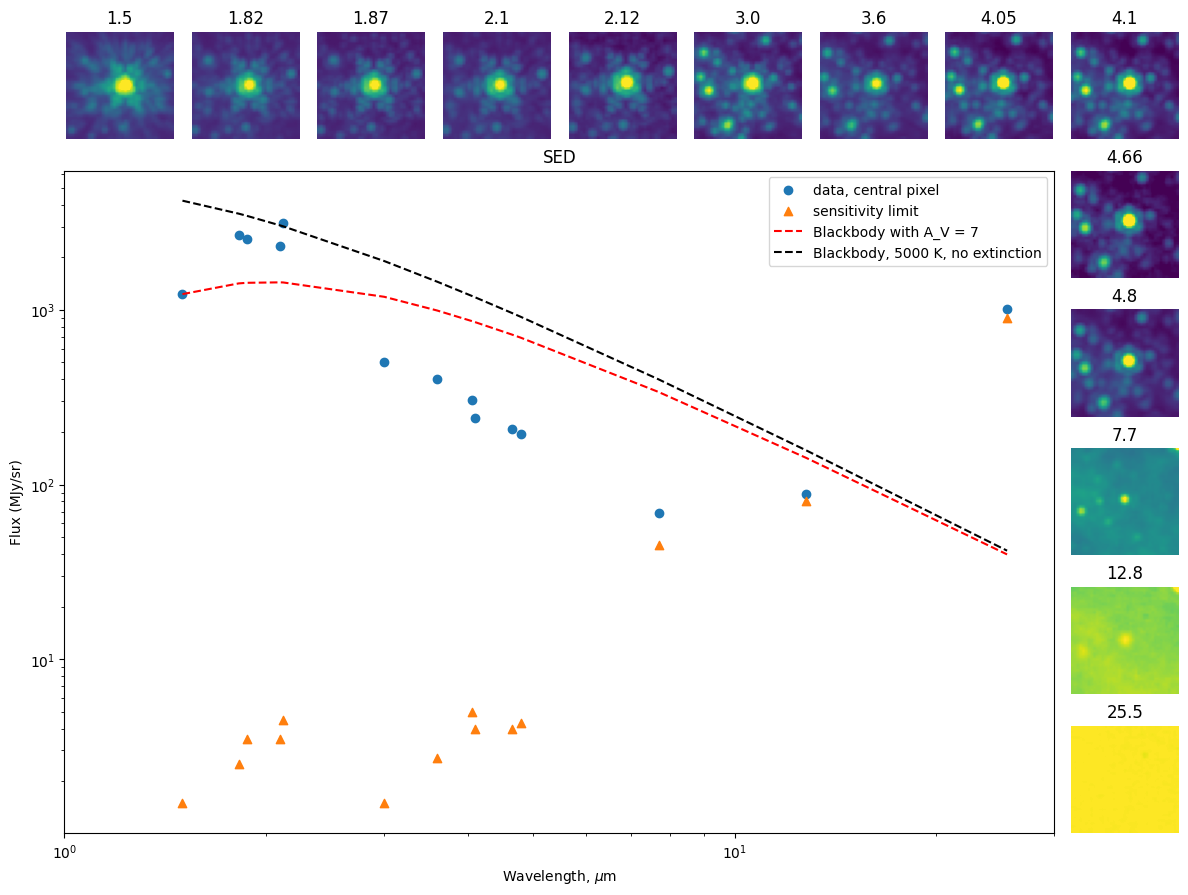

In [ ]:
create_SED_plot(3554, 717, F480M, hdul_list, plot_blackbody = True, A_V = 7, T = 5000*u.K)

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

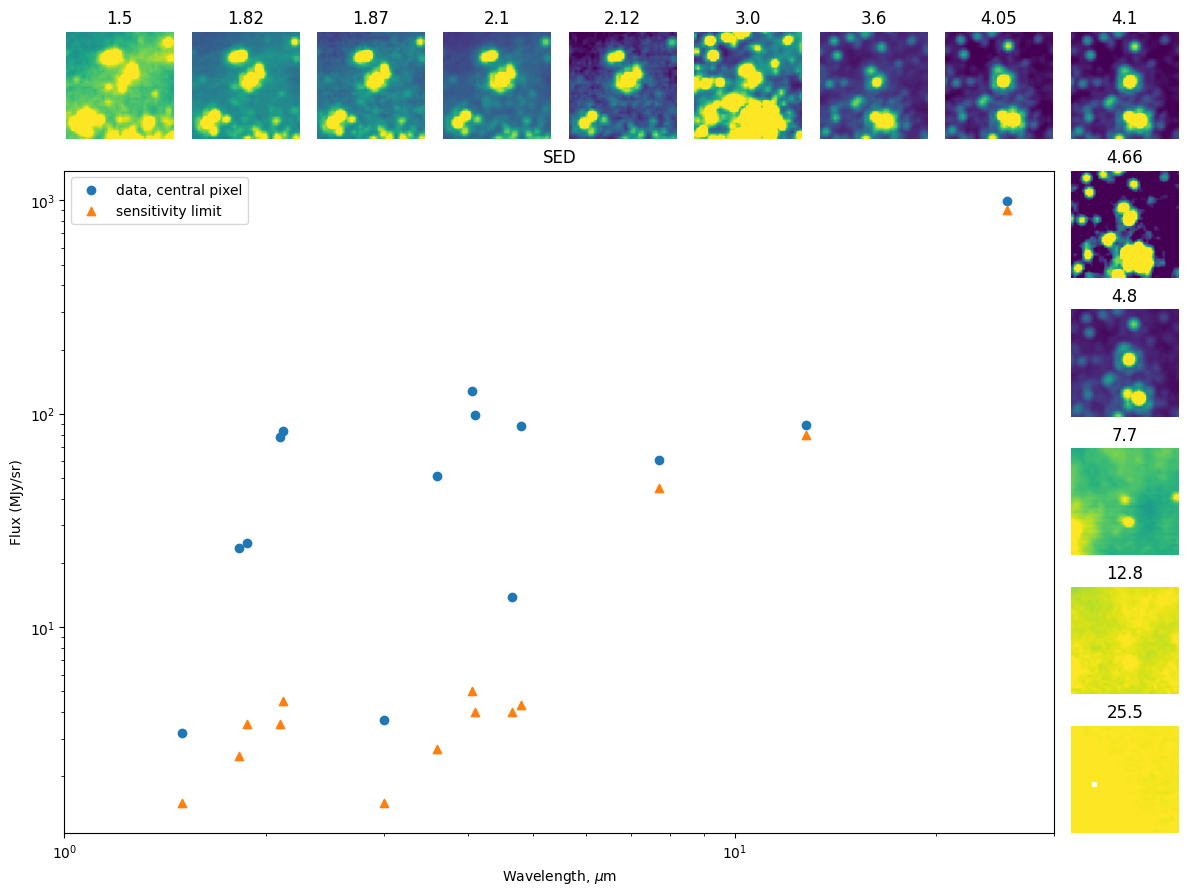

In [ ]:
# HII region candidate
create_SED_plot(3734, 433, F480M, hdul_list, plot_blackbody = False, A_V = 7, T = 10000*u.K)

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

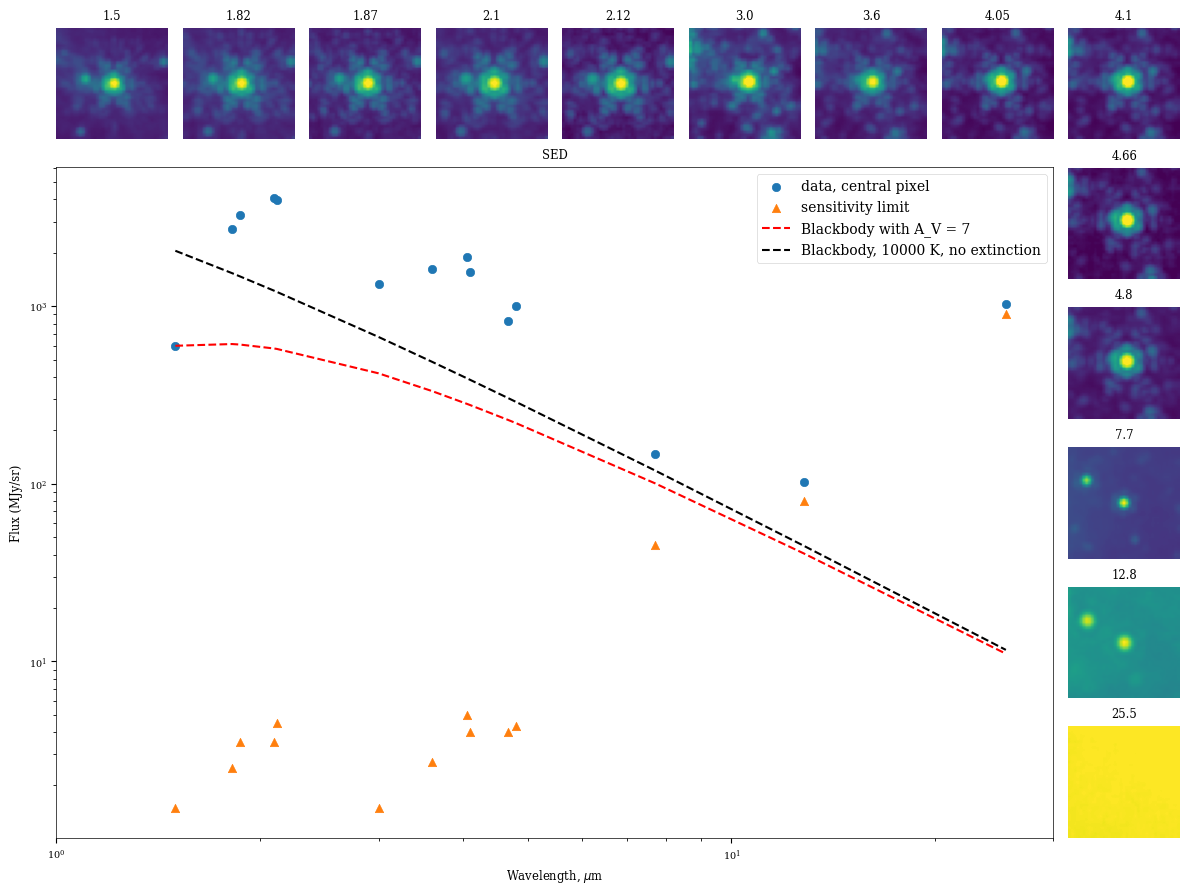

In [ ]:
# random star

create_SED_plot(3520, 908, F480M, hdul_list, plot_blackbody = True, A_V = 7, T = 10000*u.K)

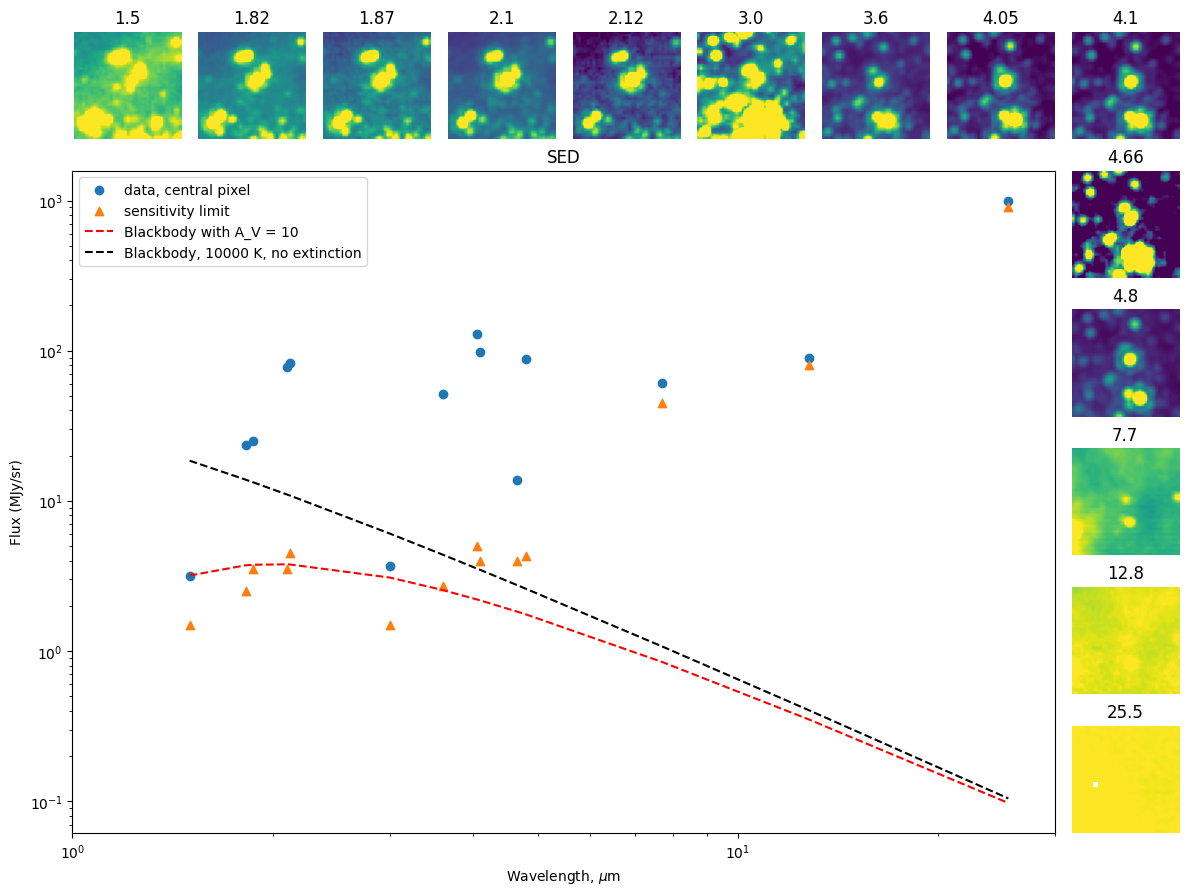

In [ ]:
create_SED_plot(3734, 433, F480M, hdul_list, plot_blackbody = True)

In [ ]:
get_SED(3734, 433, F480M, hdul_list)

[3.185245,
 23.57194,
 24.892918,
 78.03873,
 82.88773,
 3.670146,
 51.32531,
 128.25563,
 98.45544,
 13.825704,
 88.085625,
 60.85515,
 88.790344,
 997.54407]

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

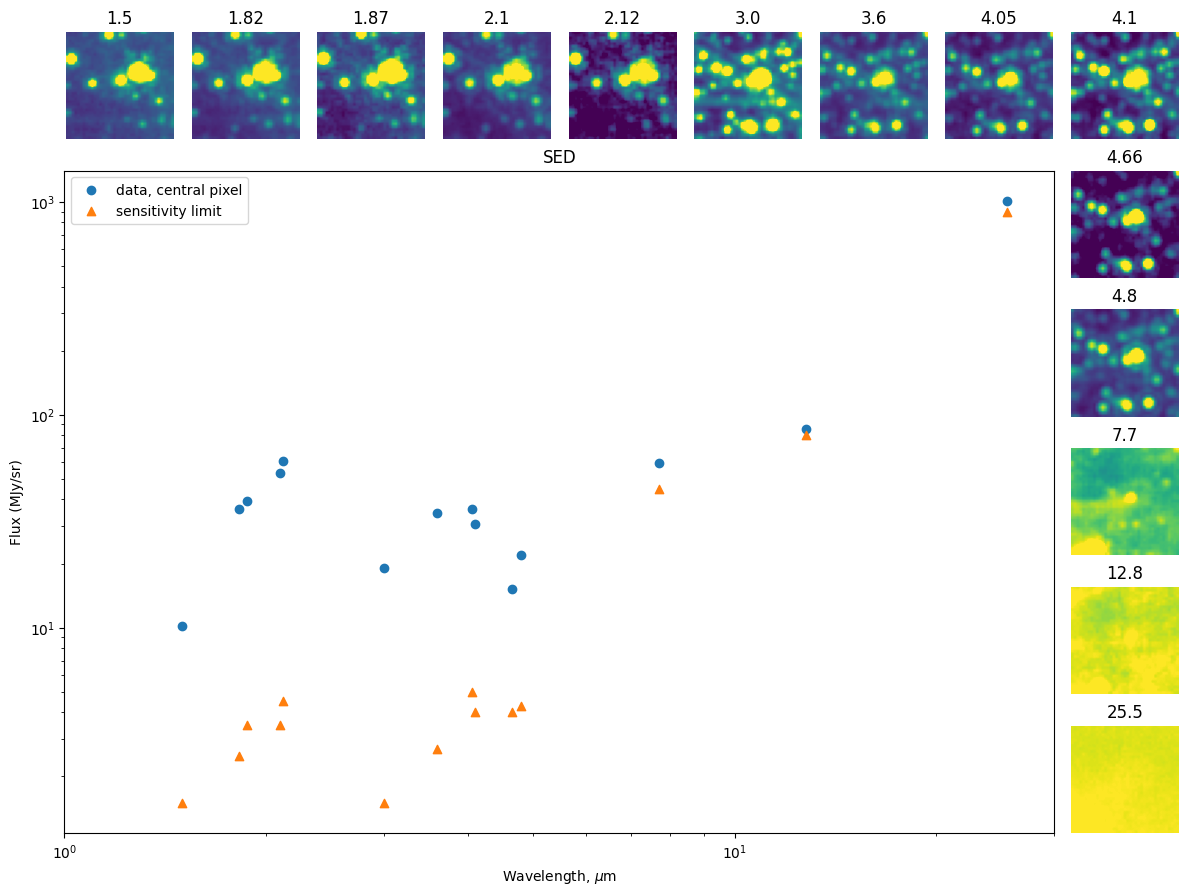

In [ ]:
create_SED_plot(4452, 1841, F480M, hdul_list, plot_blackbody = False)

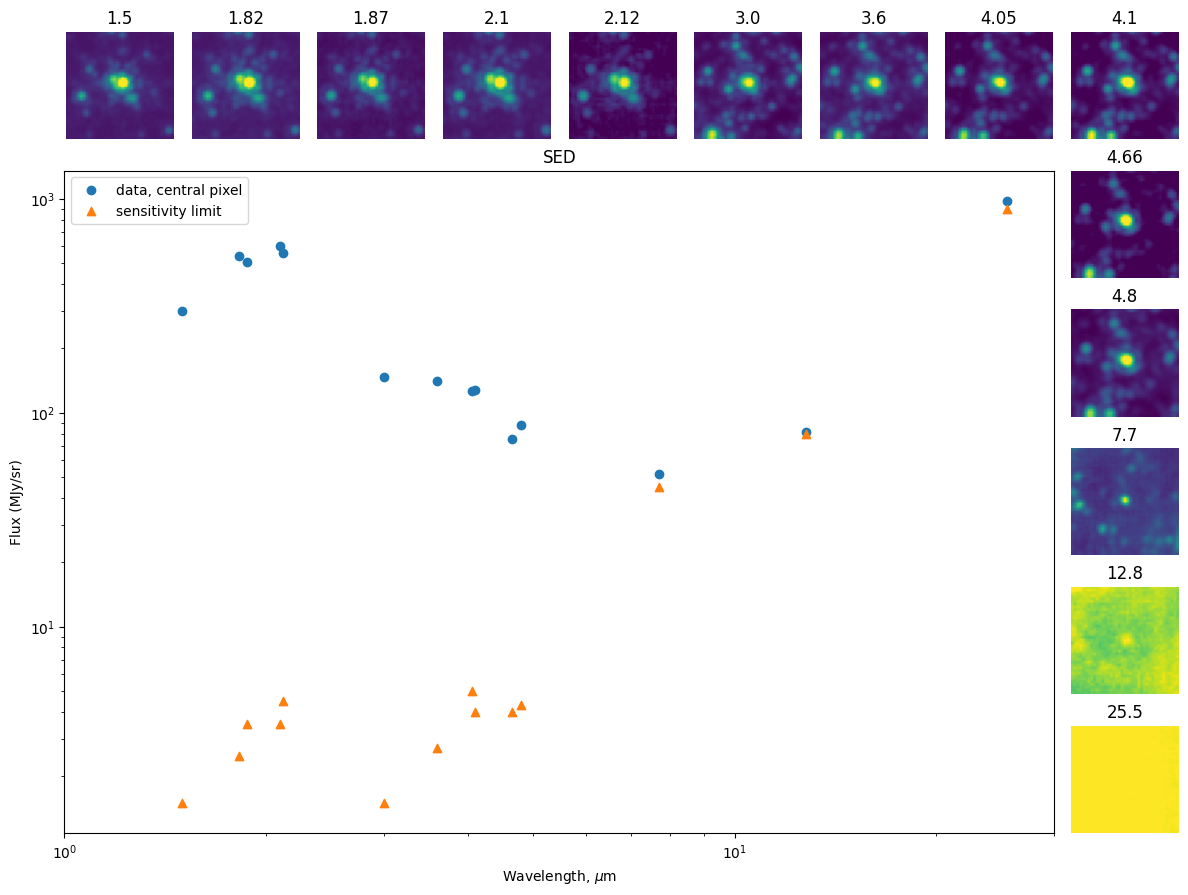

In [ ]:

create_SED_plot(4886, 1176, F480M, hdul_list, plot_blackbody = False)

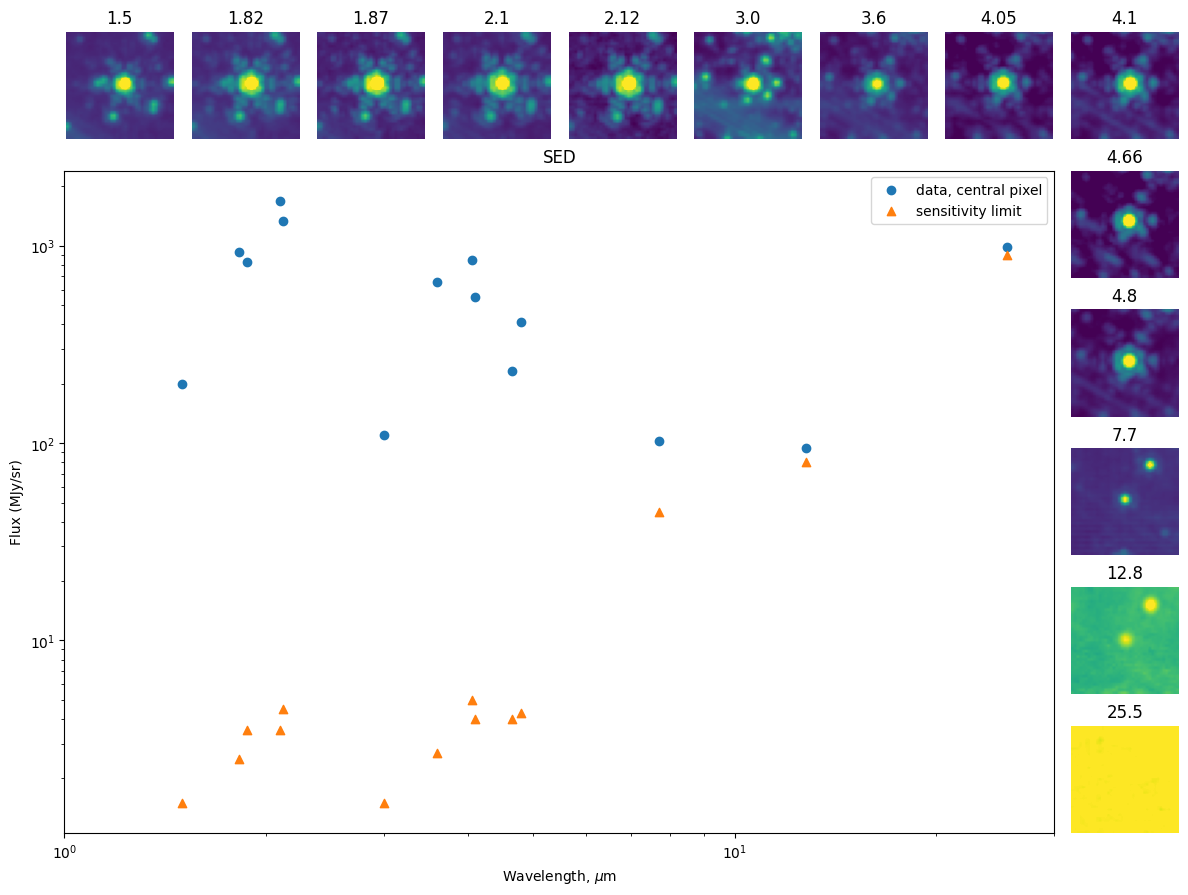

In [ ]:

create_SED_plot(4082, 502, F480M, hdul_list, plot_blackbody = False)

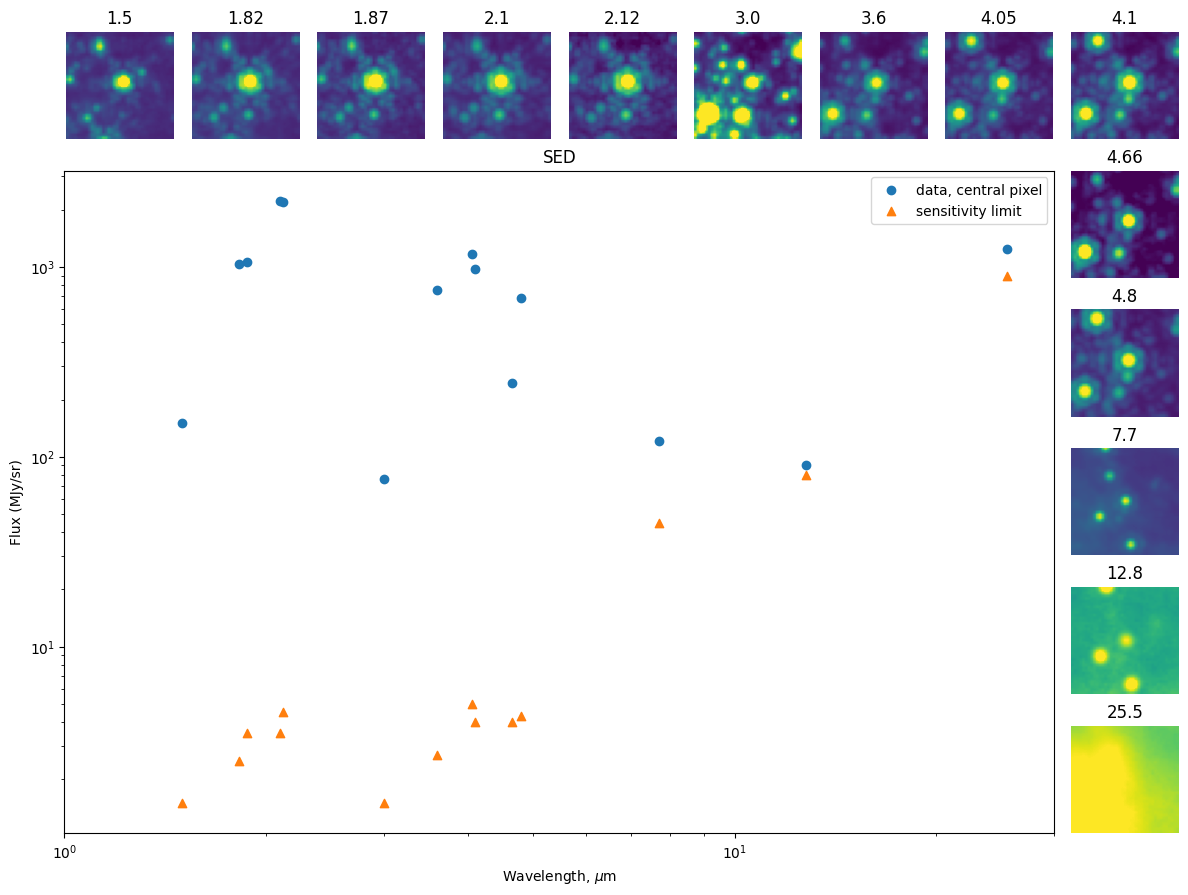

In [ ]:

create_SED_plot(3861, 1433, F480M, hdul_list, plot_blackbody = False)

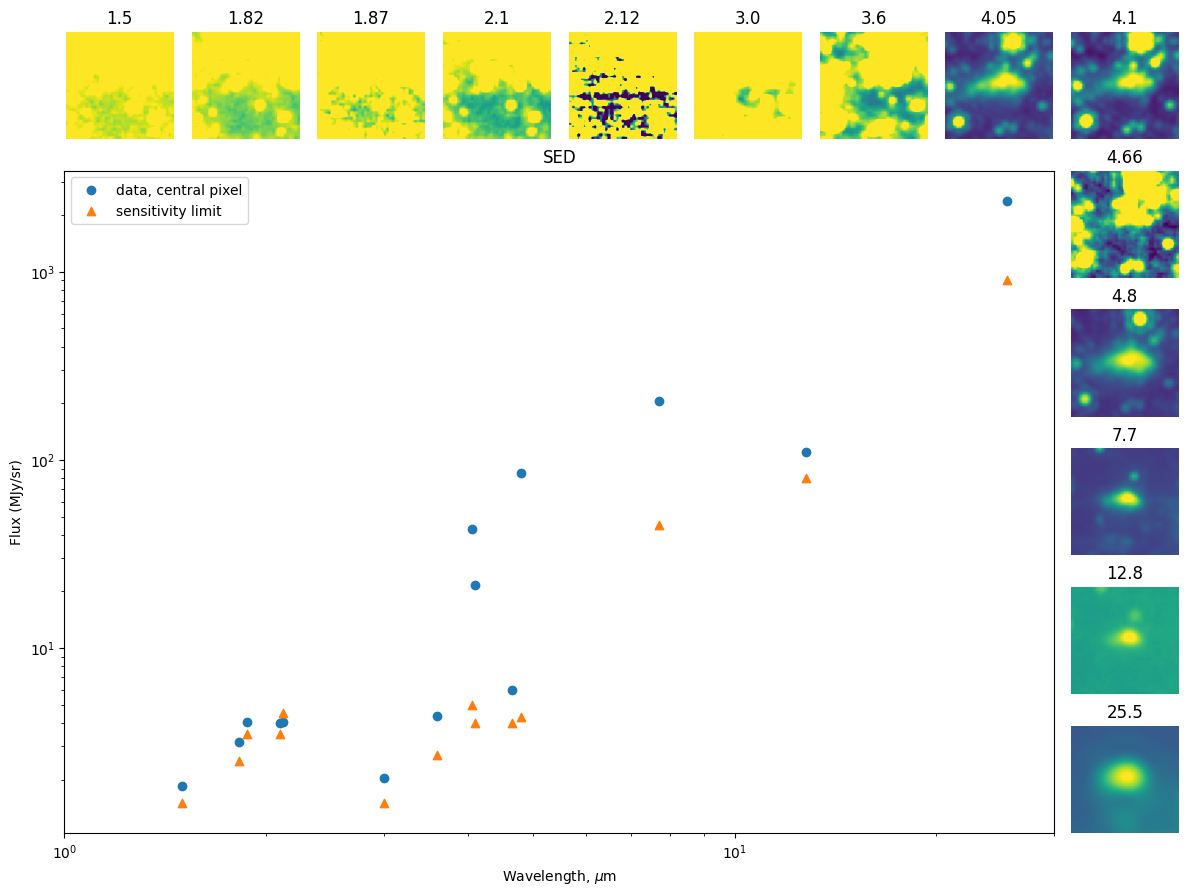

In [ ]:
# HII region extended emission:

create_SED_plot(4684, 1831, F480M, hdul_list, plot_blackbody = False)

In [ ]:
##########

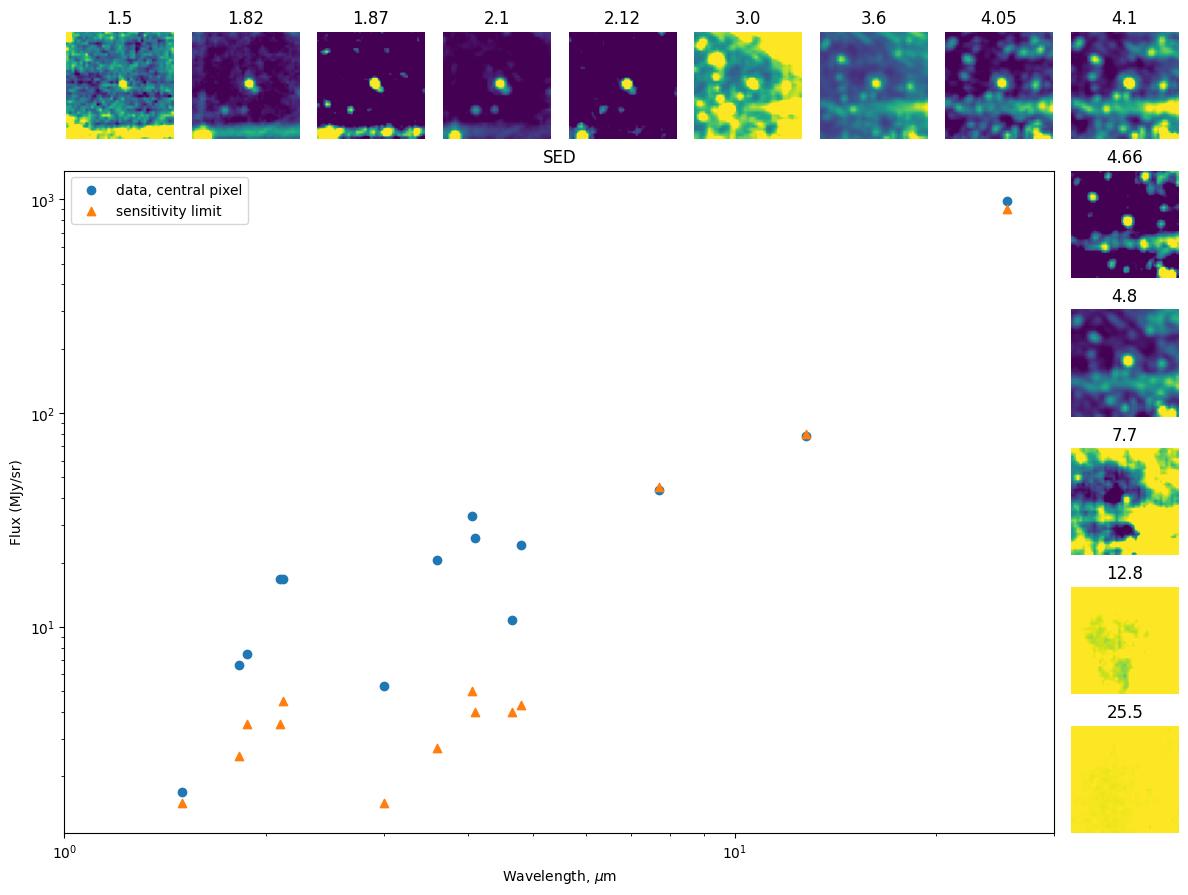

In [ ]:

create_SED_plot(4452, 1056, F480M, hdul_list, plot_blackbody = False)

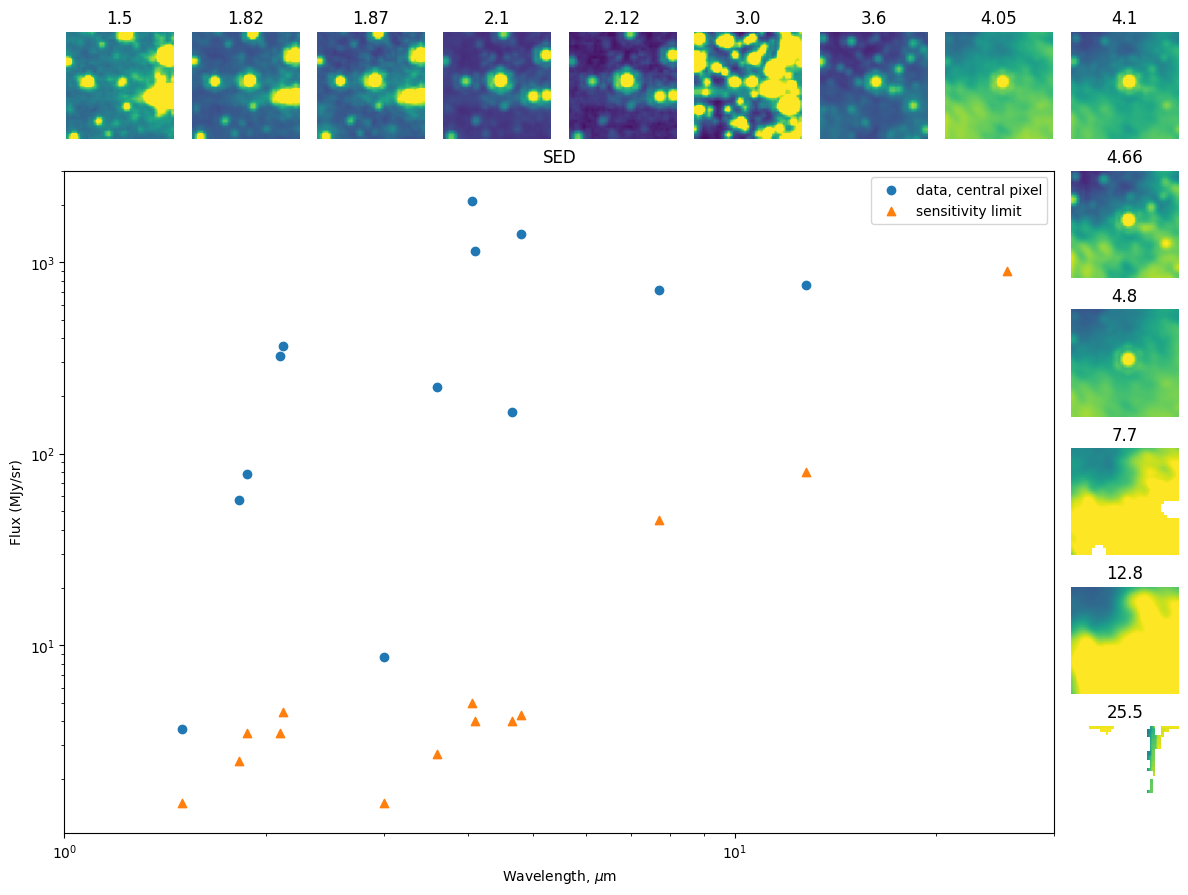

In [ ]:
create_SED_plot(3718, 1304, F480M, hdul_list, plot_blackbody = False)

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

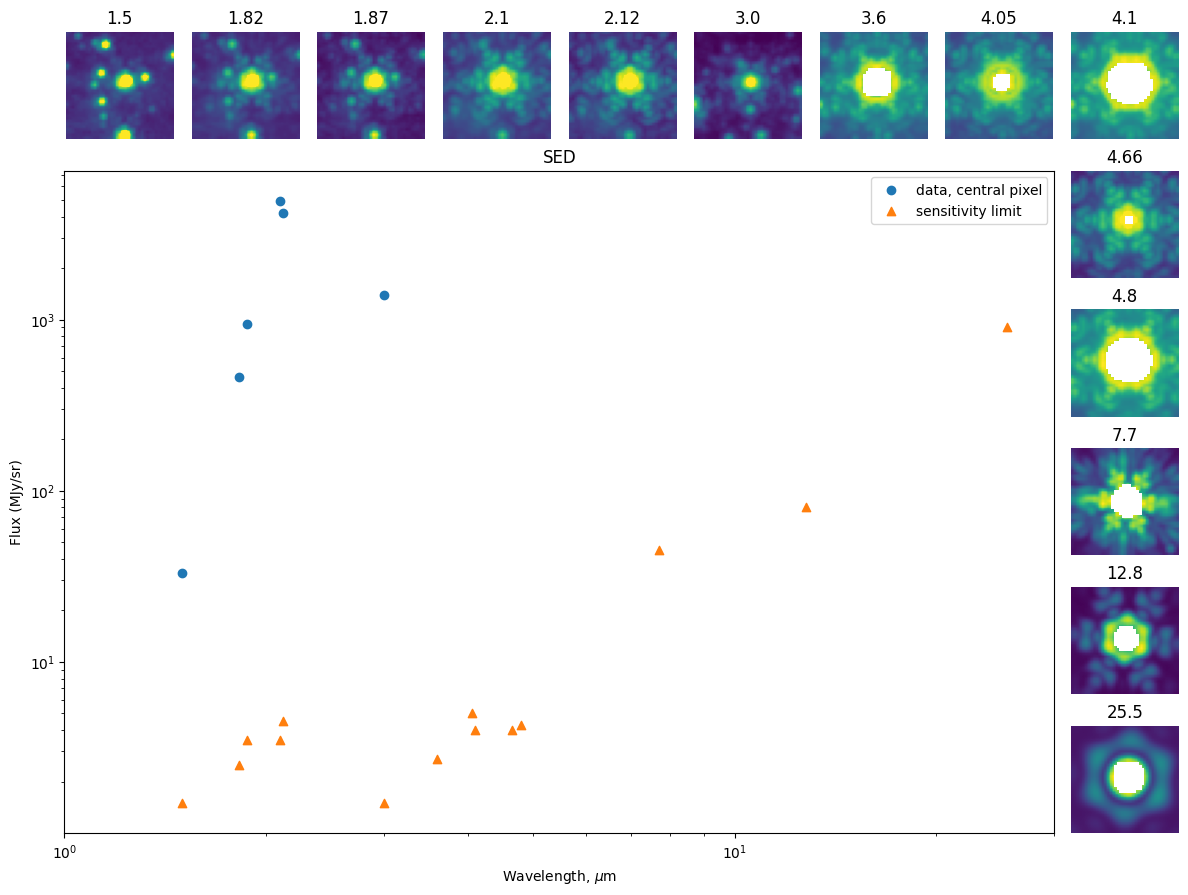

In [ ]:

create_SED_plot(4937, 935, F480M, hdul_list, plot_blackbody = False)

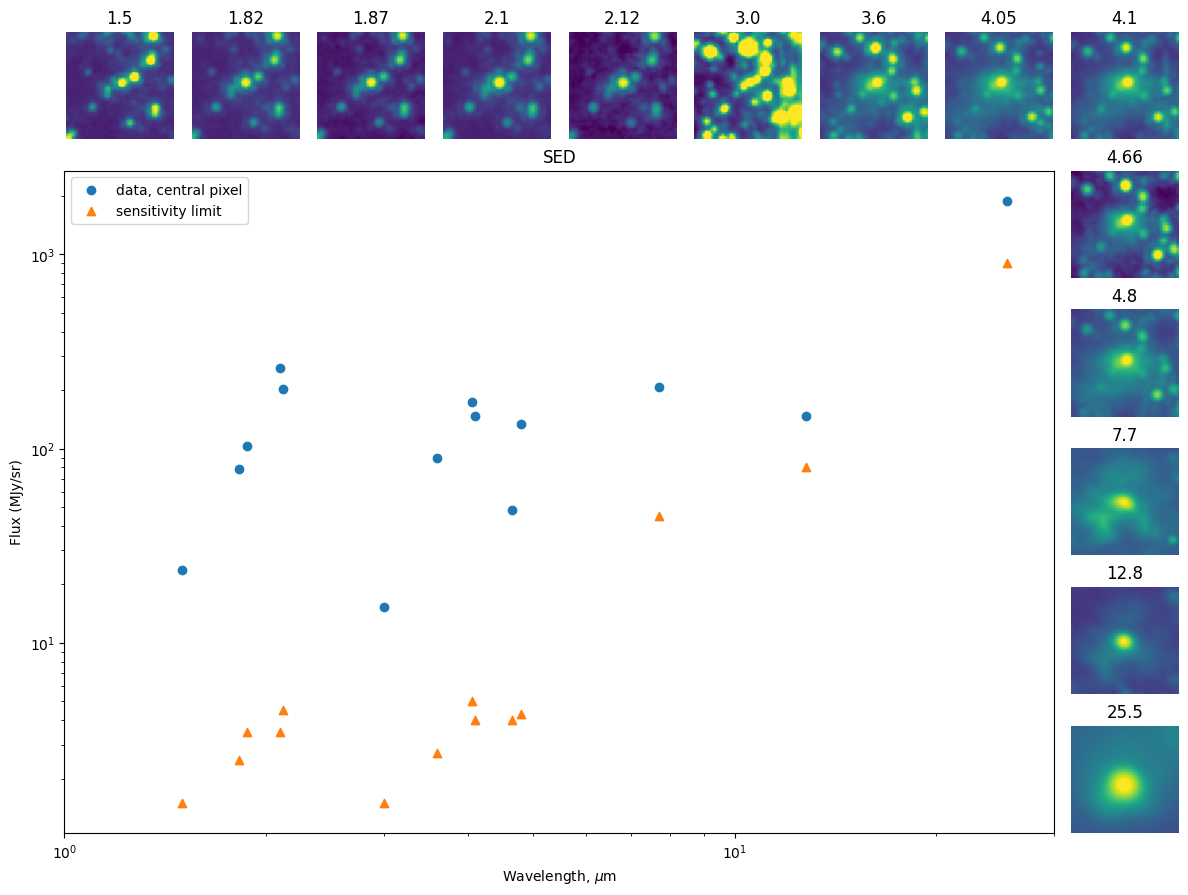

In [ ]:
create_SED_plot(3363, 1083, F480M, hdul_list, plot_blackbody = False)

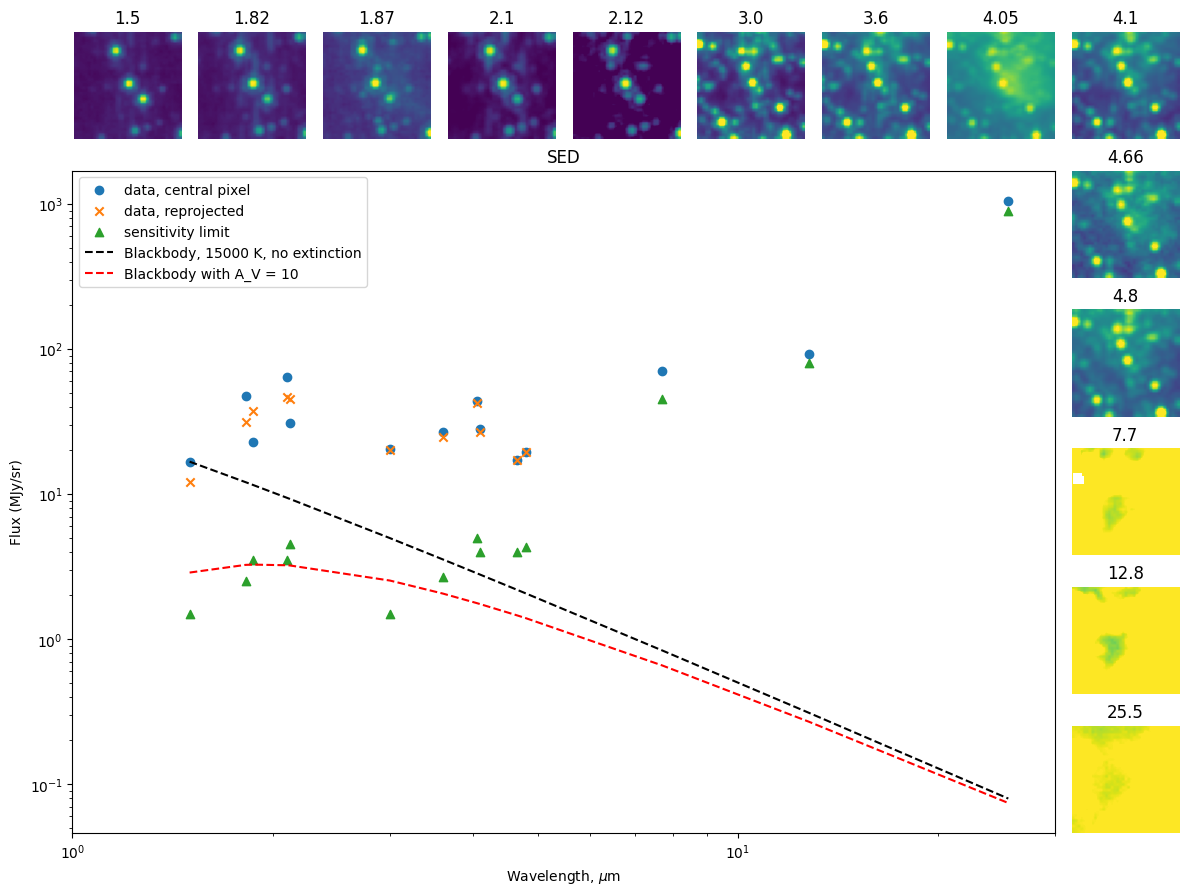

In [ ]:
create_SED_plot(807, 1934, F480M, hdul_list)

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

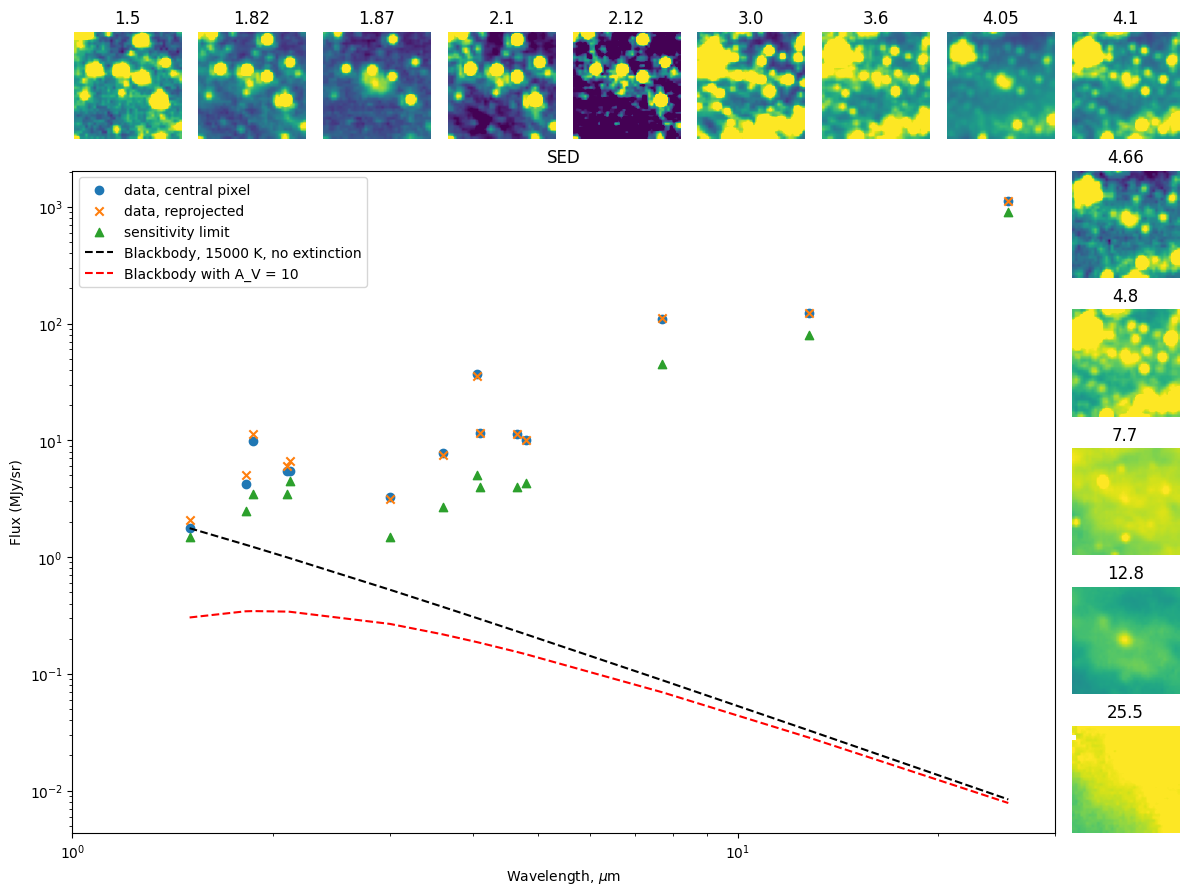

In [ ]:
create_SED_plot(2872, 1117, F480M, hdul_list)

In [ ]:
#7620, 1971

2.0238538
44.750443
32.784336
975.0903
869.9571
10.179079
2038.3165
18192.65
here
2453.3057
1502.1512
here
3014.2642
here
438.19073
257.27057
1268.674


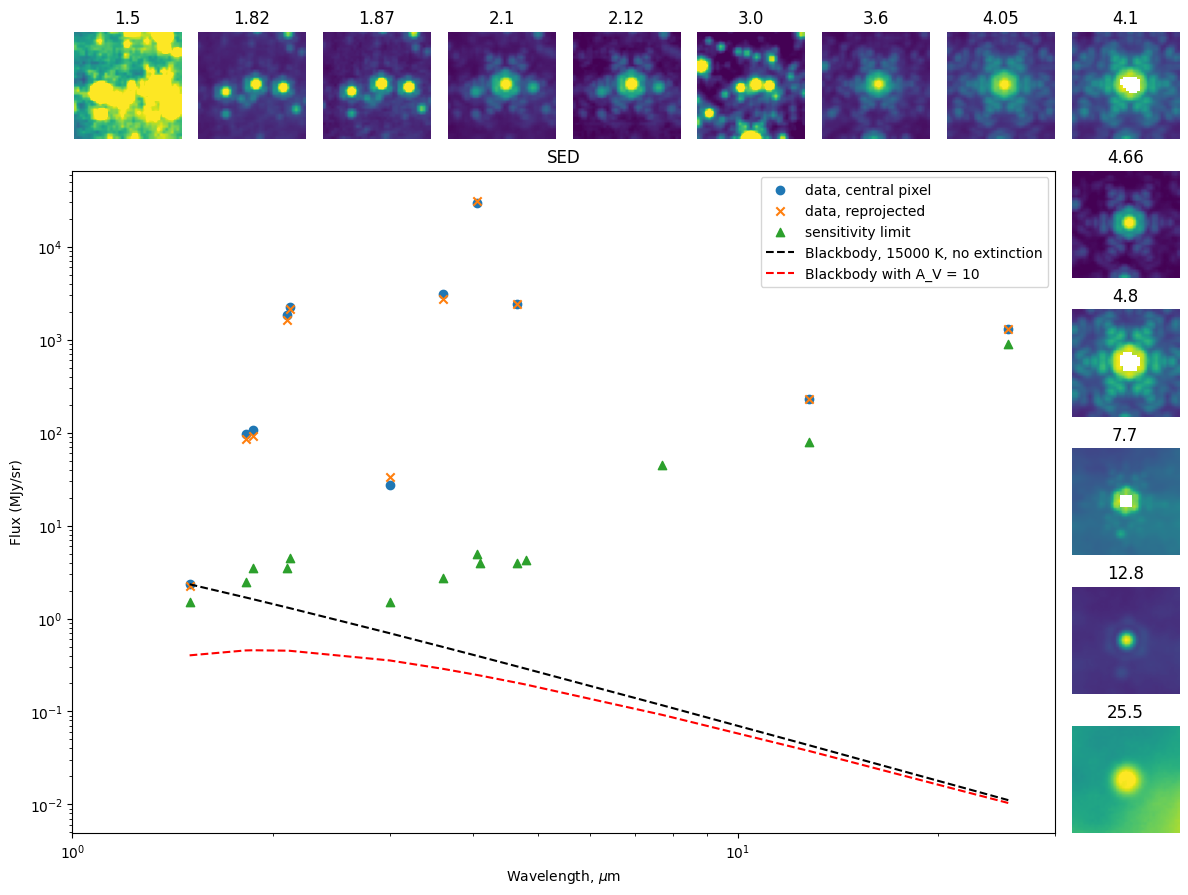

In [ ]:
create_SED_plot(4136, 1731, F480M, hdul_list)

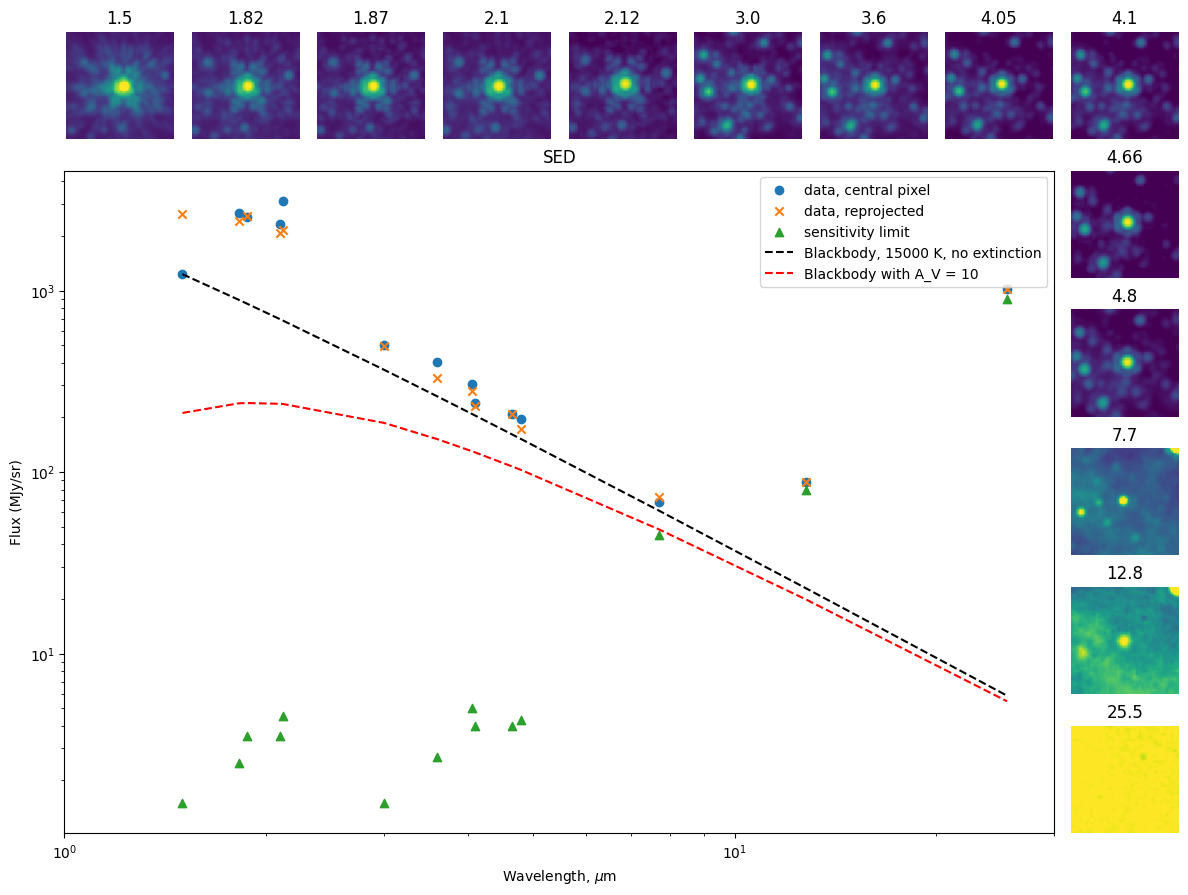

In [ ]:
#create_SED_plot(7213, 1531, F150W)
create_SED_plot(3554, 717, F480M, hdul_list)

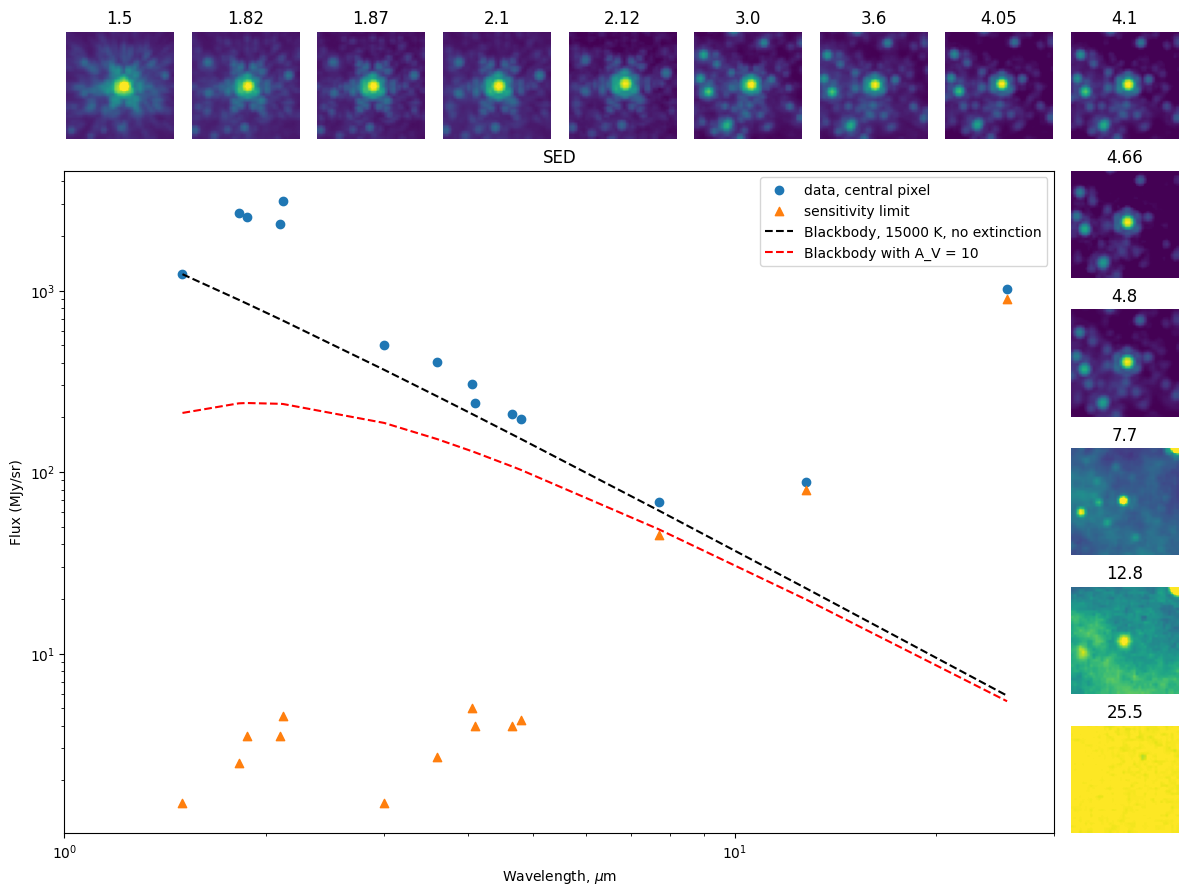

In [ ]:
create_SED_plot(3554, 717, F480M, hdul_list_r)

In [ ]:
wavelengths

[1.5, 1.82, 1.87, 2.1, 2.12, 3.0, 3.6, 4.05, 4.1, 4.66, 4.8, 7.7, 12.8, 25.5]

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

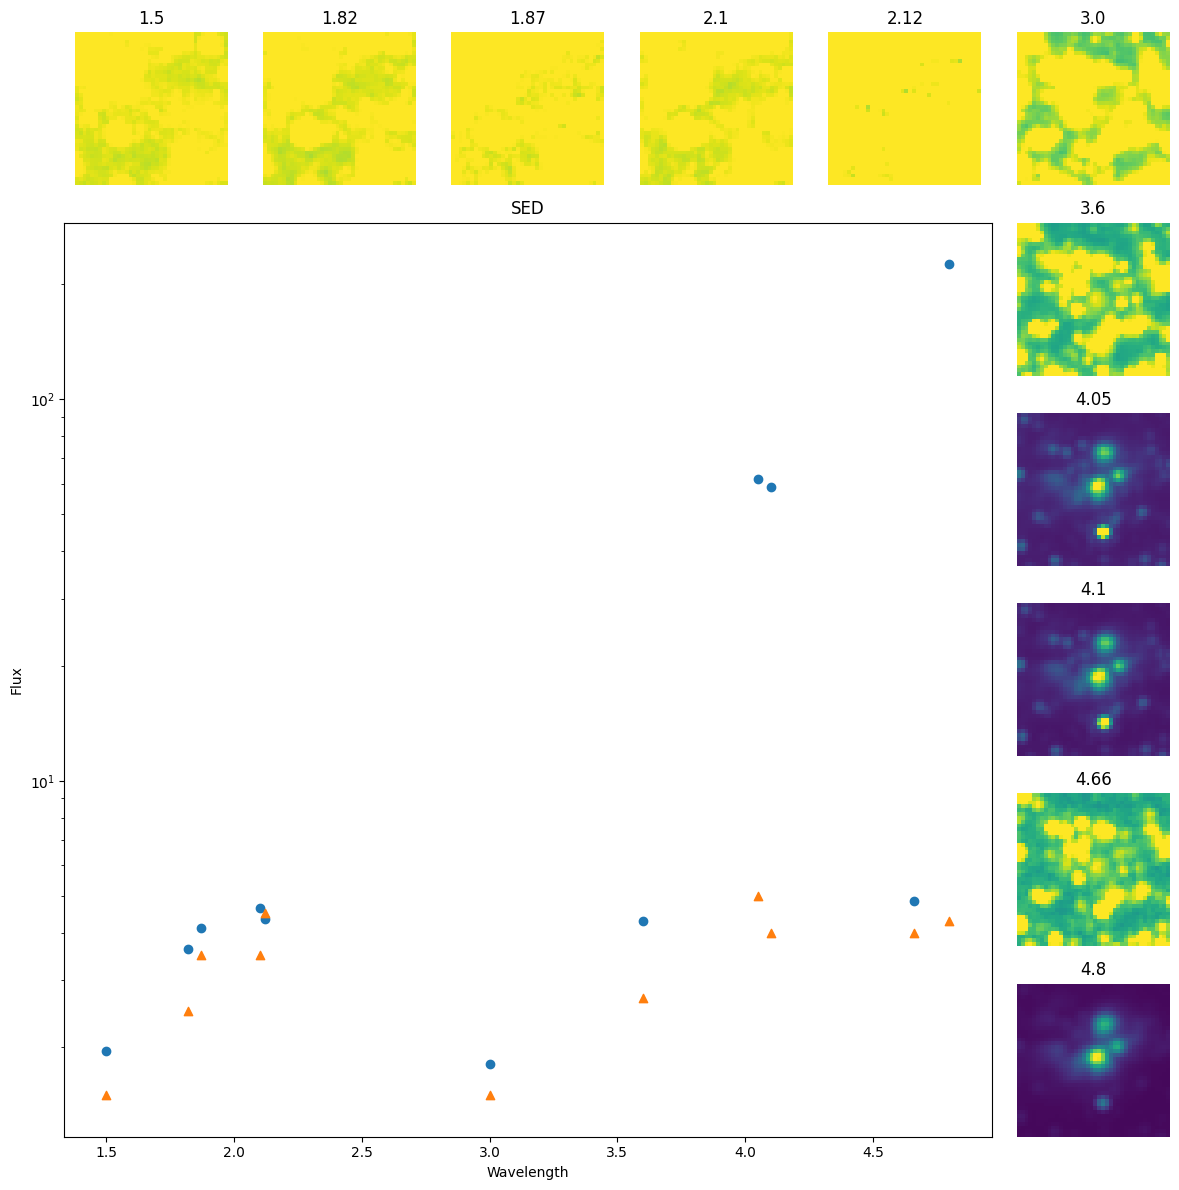

In [ ]:
create_SED_plot(3747, 900, F480M)

Set DATE-AVG to '2024-09-07T14:47:53.656' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812695.827 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

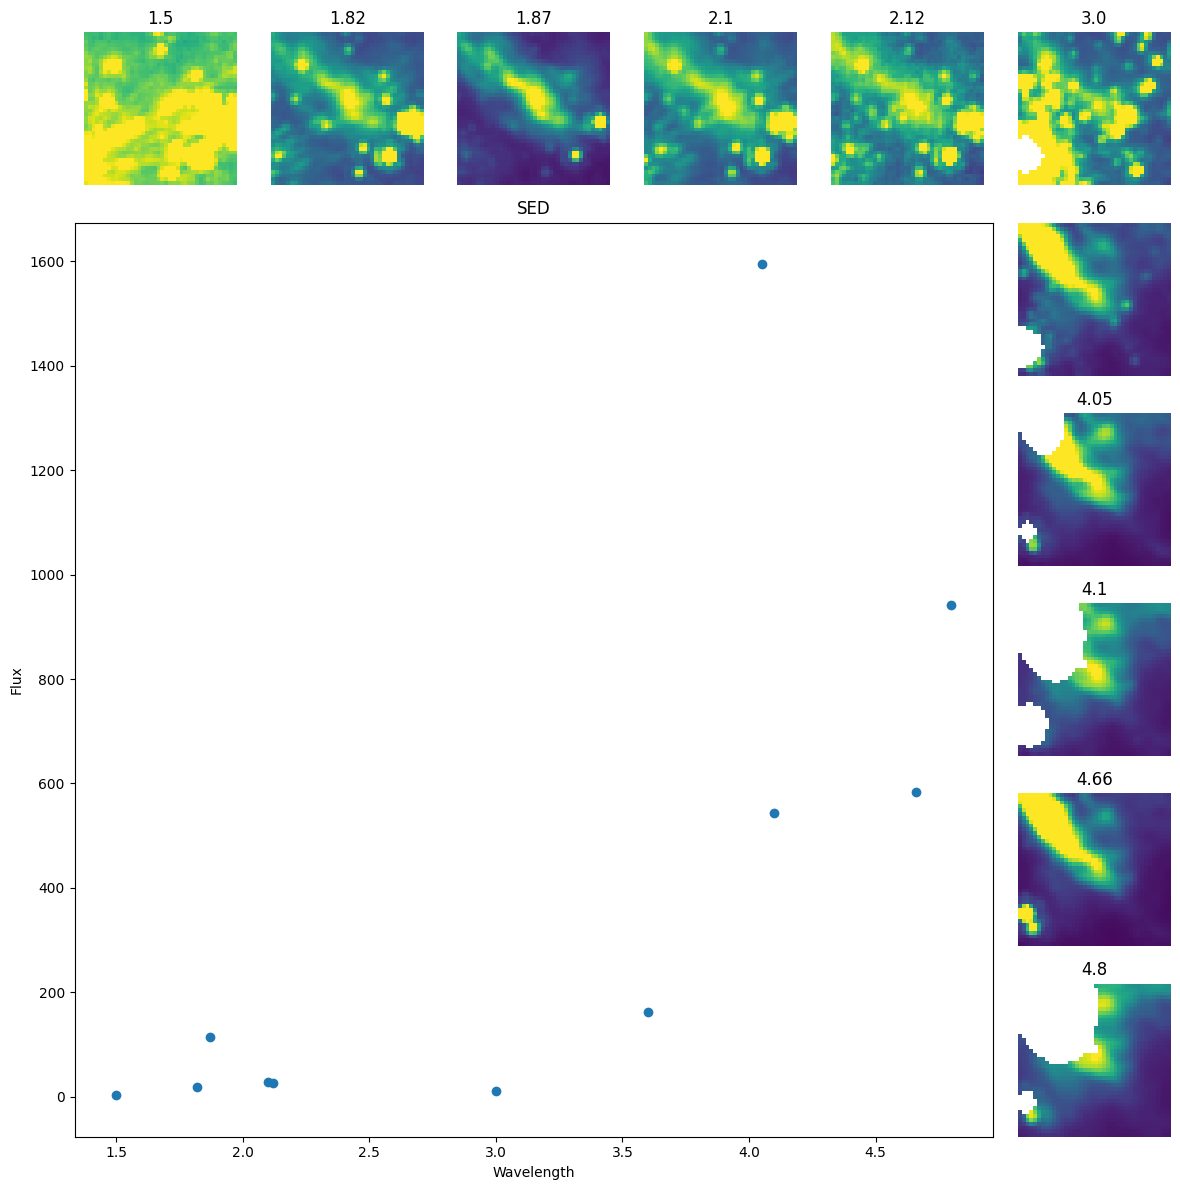

In [ ]:
create_SED_plot(6003, 2594, F210M)

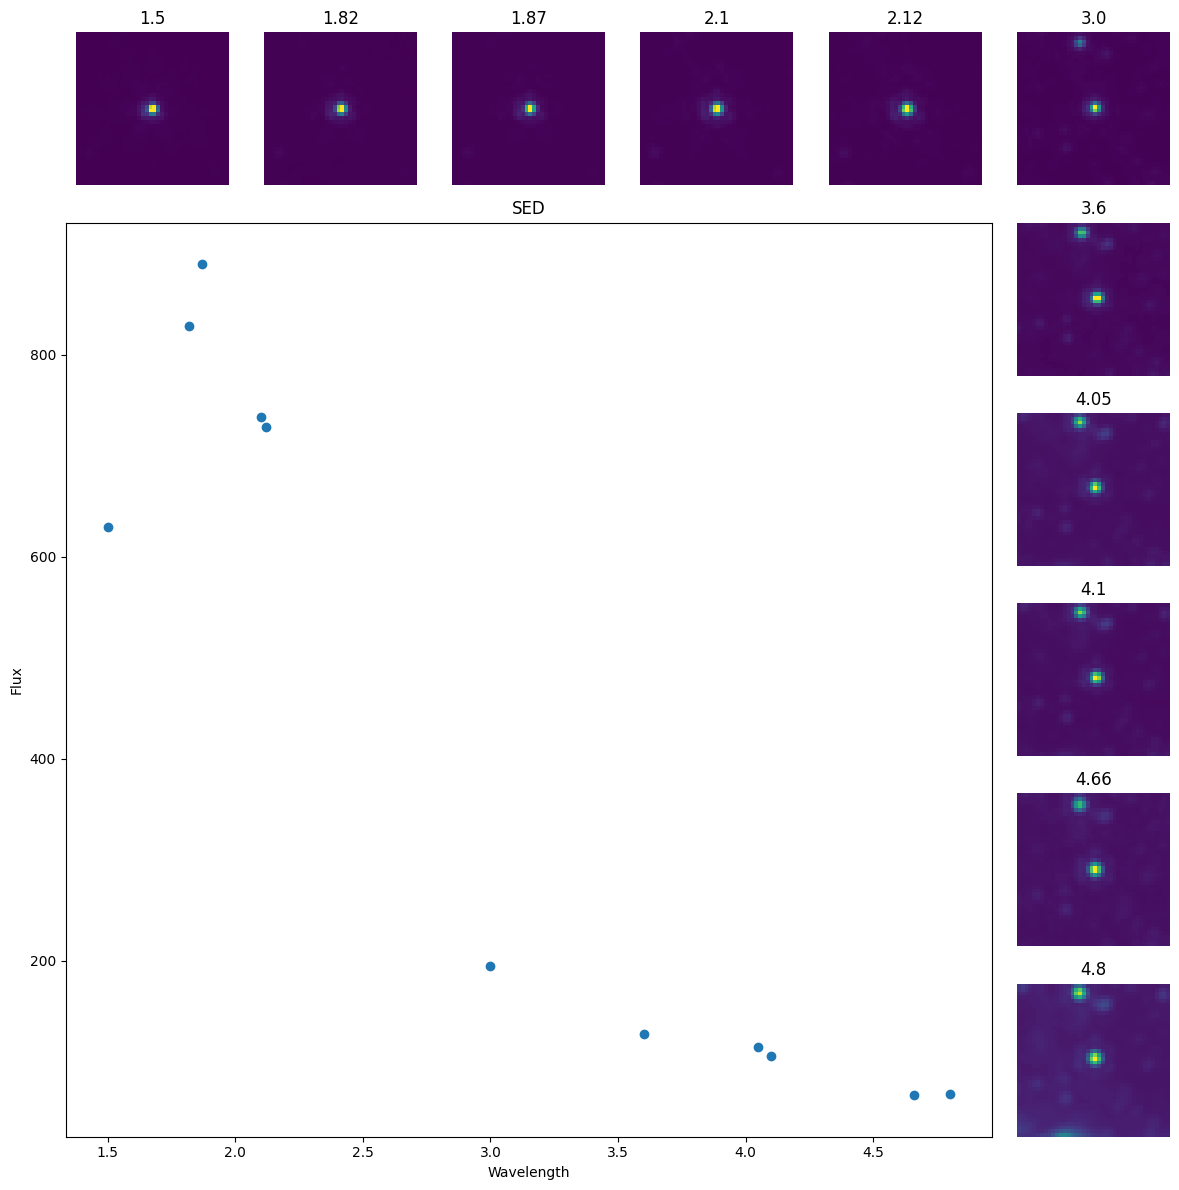

In [ ]:
create_SED_plot(7620, 1971, F187N)

([], [])

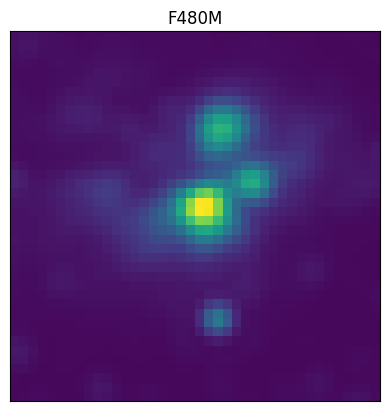

In [ ]:
data_ = F480data[y-20:y+20,x-20:x+20]
plt.imshow(data_, origin='lower', vmin = 0, vmax = np.nanmax(data_) )
plt.title('F480M')
plt.xticks([])
plt.yticks([])

In [29]:
from sedfitter.sed import SEDCube
from astropy.table import Table

In [30]:
from astropy import units as u

In [31]:
seds = SEDCube.read(f'/orange/adamginsburg/robitaille_models/spubhmi/flux.fits')

In [32]:
pars = Table.read('/blue/adamginsburg/richardson.t/research/flux/pars/spubhmi_augmented.fits')

In [33]:
import pylab as plt

In [34]:
seds.wav

<Quantity [4.83863172e+03, 4.53135115e+03, 4.24358464e+03, 3.97409293e+03,
           3.72171547e+03, 3.48536542e+03, 3.26402494e+03, 3.05674083e+03,
           2.86262044e+03, 2.68082780e+03, 2.51058002e+03, 2.35114394e+03,
           2.20183296e+03, 2.06200407e+03, 1.93105511e+03, 1.80842215e+03,
           1.69357708e+03, 1.58602533e+03, 1.48530372e+03, 1.39097850e+03,
           1.30264347e+03, 1.21991822e+03, 1.14244649e+03, 1.06989465e+03,
           1.00195027e+03, 9.38320744e+02, 8.78732052e+02, 8.22927580e+02,
           7.70667009e+02, 7.21725280e+02, 6.75891629e+02, 6.32968675e+02,
           5.92771572e+02, 5.55127213e+02, 5.19873485e+02, 4.86858568e+02,
           4.55940286e+02, 4.26985491e+02, 3.99869489e+02, 3.74475507e+02,
           3.50694187e+02, 3.28423116e+02, 3.07566384e+02, 2.88034174e+02,
           2.69742369e+02, 2.52612198e+02, 2.36569890e+02, 2.21546359e+02,
           2.07476908e+02, 1.94300947e+02, 1.81961734e+02, 1.70406131e+02,
           1.59584375e+02

In [35]:
wavelengths = [
1.50,
1.82,
1.87,
2.10,
2.12,
3.00,
3.60,
4.05,
4.10,
4.66,
4.80, 
7.70,
12.80,
25.50
]


In [36]:
def find_closest(array, value):
    array = np.asarray(array)  # Ensure input is a NumPy array
    idx = (np.abs(array - value)).argmin()  # Find index of closest value
    return array[idx], idx

In [37]:
import numpy as np

In [38]:
for i in range(len(wavelengths)):
    print(find_closest(seds.wav, wavelengths[i]))

(1.5130595313676356, 123)
(1.842216067178447, 120)
(1.842216067178447, 120)
(2.100536661217607, 118)
(2.100536661217607, 118)
(2.916114120857513, 113)
(3.550496312801306, 110)
(4.048356652311543, 108)
(4.048356652311543, 108)
(4.616028335312994, 106)
(4.929051049178435, 105)
(7.802383022829454, 98)
(13.188216452057265, 90)
(25.4176015070653, 80)


In [39]:
# the "true" continuum will come from 150, 360, 480, 770, 1280, 2550.

In [40]:
def filter_fluxes(fluxes):
    #return fluxes[0, 6, 10, 11, 12, 13]
    return [fluxes[0], fluxes[6], fluxes[10], fluxes[11], fluxes[12], fluxes[13]]

In [41]:
filter_fluxes(get_SED(3734, 433, F480M, hdul_list))

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

[3.185245, 51.32531, 88.085625, 60.85515, 88.790344, 997.54407]

Text(0.5, 0, 'wavelength, um')

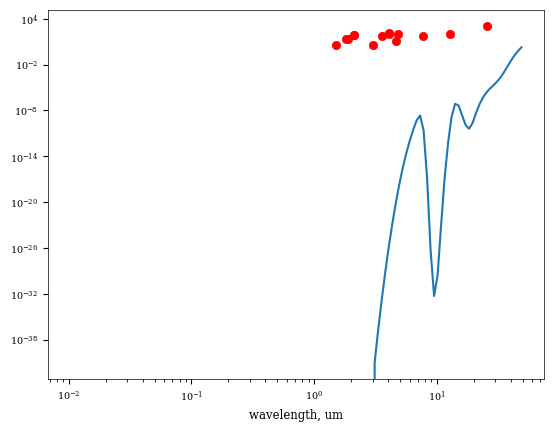

In [42]:
plt.plot(seds.wav.value, seds.val[100][0])
plt.scatter(wavelengths, get_SED(3734, 433, F480M, hdul_list), color = 'red')
plt.loglog()
plt.xlabel('wavelength, um')

In [43]:
seds.val[:,4,20]

<Quantity [       nan,        nan,        nan, ..., 0.02195024, 0.02160136,
           0.02188491] mJy>

In [44]:
#4141, 1521 RGB PLOT
#3734, 433 plot for FINESST 
fluxes_filtered = filter_fluxes(get_SED(3734, 433, F480M, hdul_list))
wavelengths_filtered = [
1.50,
3.60,
4.80, 
7.70,
12.80,
25.50
]

In [45]:
pars['F150W'] = seds.val[:,4,123] # 4 -> 700 AU, 123 -> 1.5 um
pars['F360M'] = seds.val[:,4,110] # 4 -> 700 AU, 123 -> 3.6 um
pars['F480M'] = seds.val[:,4,105] # 4 -> 700 AU, 105 -> 4.8 um
pars['F770W'] = seds.val[:,4,98]
pars['F1280W'] = seds.val[:,4,90]
pars['F2550W'] = seds.val[:,4,80]

In [46]:
delta = 0.25
pars_match = []
pars_match = np.abs((pars['F150W'] / 8.5**2 - fluxes_filtered[0]) / fluxes_filtered[0]) < delta
pars_match &= np.abs((pars['F360M'] / 8.5**2 - fluxes_filtered[1]) / fluxes_filtered[1]) < delta
#pars_match &= np.abs((pars['F480M'] / 8.5**2 - fluxes_filtered[2]) / fluxes_filtered[2]) < delta
pars_match &= np.abs((pars['F770W'] / 8.5**2 - fluxes_filtered[3]) / fluxes_filtered[3]) < delta
pars_match &= pars['F1280W'] / 8.5**2 < fluxes_filtered[4]

In [47]:
np.sum(pars_match)

41

In [48]:
seds_match = seds.val[pars_match]

In [49]:
fluxes = np.array(get_SED(3734, 433, F480M, hdul_list))
#fluxes = np.array(get_SED(4141, 1521, F480M, hdul_list))

In [50]:
from radio_beam import Beam
def read_in(path):
    """
    Simplify reading in the files.
    """
    fh=fits.open(path)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        wcs = WCS(fh[0].header)
        hdr = fh[0].header
    datas=fh[0].data #
    return datas, wcs, hdr
base = '/orange/adamginsburg/sgrb2/NB/the_end/'
pathNB3 = base+'sgr_b2.N.B3.cont.r0.5.1m0.075mJy.cal2.image.tt0.pbcor.fits'
pathNB6 = base+'sgr_b2.N.B6.cont.r0.5.1m1.5mJy.cal4.image.tt0.pbcor.fits'
dataNB3, wcsNB3, hdrNB3 = read_in(pathNB3)
dataNB6, wcsNB6, hdrNB6 = read_in(pathNB6)
my_beamNB3 = Beam.from_fits_header(hdrNB3)
my_beamNB6 = Beam.from_fits_header(hdrNB6)
B3freq = 92.45* u.GHz
B6freq = 225.78 * u.GHz
sens_1mm = (0.25 * u.mJy/my_beamNB6.sr).to(u.MJy/u.sr) * 2
sens_3mm = (0.033 * u.mJy/my_beamNB3.sr).to(u.MJy/u.sr) * 2


my_beam_VLA = Beam(0.62*u.arcsec, 0.28*u.arcsec)
VLA_freq = 6*u.GHz
sens_VLA = (3*u.mJy/my_beam_VLA.sr).to(u.MJy/u.sr)

In [51]:
plt.style.use('default')

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

NameError: name 'wavelength' is not defined

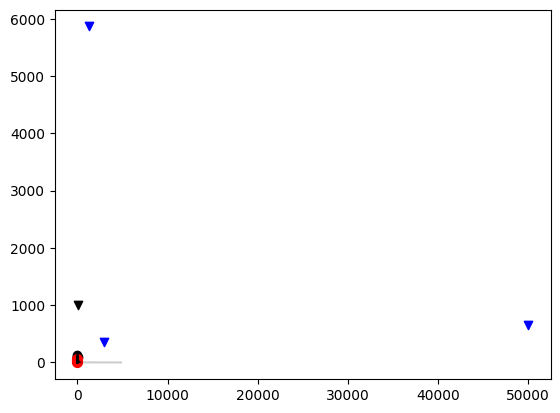

In [52]:
#plt.plot(seds.wav.value, seds_match[0,4])
fontsize = 20
[plt.plot(seds.wav.value, SED[4]/8.5**2, color = 'k', alpha = 0.1) for SED in seds_match]
plt.scatter(wavelengths[:-1], get_SED(3734, 433, F480M, hdul_list)[:-1], color = 'k', label = 'JWST, w/ line "contamination"')
plt.scatter([1.5, 3.6, 7.7], [get_SED(3734, 433, F480M, hdul_list)[0],get_SED(3734, 433, F480M, hdul_list)[6],get_SED(3734, 433, F480M, hdul_list)[11]], color = 'red', s = 50, label = 'JWST, "true" continuum')
plt.scatter([1300, 3000, 50000], [sens_1mm.value, sens_3mm.value, sens_VLA.value], color = 'blue', label = 'ALMA upper limits', marker = 'v')
plt.scatter(wavelengths[-1],get_SED(3734, 433, F480M, hdul_list)[-1], color = 'k', marker = 'v')
plt.plot(wavelength, SED_extincted*10**2.73, label=f"Free-free emission (HII region) ($A_V$ = {A_V})", color='r', lw=2)
plt.loglog()
#plt.yscale('log')
#plt.xlim(0.7,4000)
plt.xlim(0.7,60000)
#plt.xlim(5,30)
plt.ylim(10**-2, 10**4)
plt.xlabel(r'Wavelength ($\mu$m)', fontsize=fontsize)
plt.ylabel('Flux density (MJy sr$^{-1}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize-4)
plt.legend(fontsize=fontsize-4, loc='lower left')
#plt.savefig('/orange/adamginsburg/jwst/sgrb2/NB/FINESST_SED.png', dpi=300, bbox_inches='tight')

In [ ]:
mached_table = pars[pars_match]

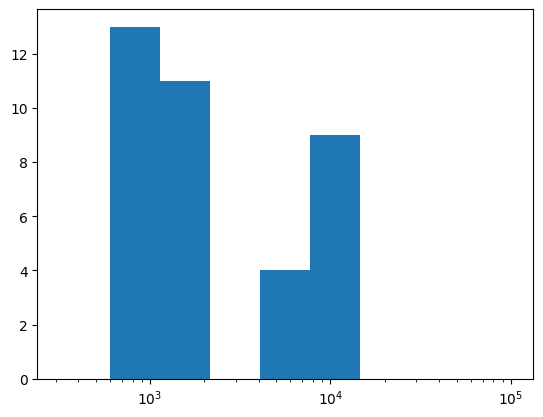

In [ ]:
bins = np.logspace(2.5,5,10)
plt.hist(mached_table['Model Luminosity'], bins = bins)
plt.xscale('log')

In [ ]:
A_V = 20
R_V = 3.1
wavelengths_angstrom = (wavelengths * u.um).to(u.AA).value
fluxes_ext = apply(extinction.fitzpatrick99(wavelengths_angstrom, A_V, R_V), fluxes)
ext_correction_AV10 = fluxes_ext/fluxes

In [ ]:
delta = 0.2
pars_match = []
pars_match = np.abs(((pars['F150W'] / 8.5**2) - (fluxes_filtered[0]/ext_correction_AV10[0])) / (fluxes_filtered[0]/ext_correction_AV10[0])) < delta
pars_match &= np.abs(((pars['F360M'] / 8.5**2) - (fluxes_filtered[1]/ext_correction_AV10[6])) / (fluxes_filtered[1]/ext_correction_AV10[6])) < delta
#pars_match &= np.abs((pars['F480M'] / 8.5**2 - fluxes_filtered[2]) / fluxes_filtered[10]) < delta
pars_match &= np.abs(((pars['F770W'] / 8.5**2) - (fluxes_filtered[3]/ext_correction_AV10[11])) / (fluxes_filtered[3]/ext_correction_AV10[11])) < delta
pars_match &= pars['F1280W'] / 8.5**2 < (fluxes_filtered[4]/ext_correction_AV10[12])

In [ ]:
sum(pars_match)

40

In [ ]:
seds_match = seds.val[pars_match]

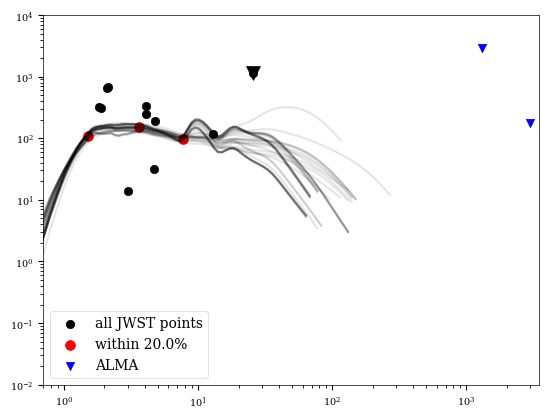

In [ ]:
#plt.plot(seds.wav.value, seds_match[0,4])
[plt.plot(seds.wav.value, SED[4]/8.5**2, color = 'k', alpha = 0.1) for SED in seds_match]
plt.scatter(wavelengths, get_SED(3734, 433, F480M, hdul_list)/ext_correction_AV10, color = 'k', label = 'all JWST points')
plt.scatter([1.5, 3.6, 7.7], [get_SED(3734, 433, F480M, hdul_list)[0]/ext_correction_AV10[0],get_SED(3734, 433, F480M, hdul_list)[6]/ext_correction_AV10[6],get_SED(3734, 433, F480M, hdul_list)[11]/ext_correction_AV10[11]], color = 'red', s = 50, label = f'within {delta*100}%')
#plt.scatter([1.5, 3.6, 4.8, 7.7], [get_SED(3734, 433, F480M, hdul_list)[0]/ext_correction_AV10[0],get_SED(3734, 433, F480M, hdul_list)[6]/ext_correction_AV10[6],get_SED(3734, 433, F480M, hdul_list)[10]/ext_correction_AV10[10],get_SED(3734, 433, F480M, hdul_list)[11]/ext_correction_AV10[11]], color = 'red', s = 50, label = f'within {delta*100}%')
plt.scatter([1300, 3000], [sens_1mm.value, sens_3mm.value], color = 'blue', label = 'ALMA', marker = 'v')
plt.scatter(wavelengths[-1],get_SED(3734, 433, F480M, hdul_list)[-1]/ext_correction_AV10[-1], color = 'k', marker = 'v', s =100)
plt.loglog()
plt.xlim(0.7,3500)
plt.ylim(10**-2, 10**4)
plt.legend()

In [ ]:
# Jy/beam -> MJy/sr
#0.033 at 3mm
#0.25 at 1 mm



In [ ]:
sens_3mm

<Quantity 175.06085057 MJy / sr>

In [ ]:
mached_table = pars[pars_match]

In [ ]:
mached_table

<Table length=40>
 MODEL_NAME star.radius star.temperature ...   F770W     F1280W    F2550W 
                                         ...    mJy       mJy       mJy   
  bytes20     float64       float64      ...  float32   float32   float32 
----------- ----------- ---------------- ... --------- --------- ---------
47zWtN7t_08       81.74           5133.0 ...  8360.641   5625.55 4138.6396
8PDFK47H_01       99.63           3972.0 ...  7152.816  6800.415 6721.9365
8PDFK47H_02       99.63           3972.0 ... 7390.8647  6858.576 6679.4307
8PDFK47H_03       99.63           3972.0 ... 7647.7275  6831.384  6493.179
8PDFK47H_04       99.63           3972.0 ... 7828.1523  6542.082    5942.1
8PDFK47H_05       99.63           3972.0 ...   7798.76  6284.903 5557.2974
8PDFK47H_06       99.63           3972.0 ... 7539.1016 5618.0835  4659.606
8PDFK47H_07       99.63           3972.0 ... 7345.5425  5263.675 4211.4473
Agiz11ew_07       95.97           4459.0 ...  8366.594  7556.655  7427.381
        ...         ...              ... ...       ...       ...       ...
lw84HJjQ_03       94.03           5326.0 ... 6878.8467 5006.4673    3118.1
lw84HJjQ_04       94.03           5326.0 ...  6869.342 5002.2188 3119.1204
lw84HJjQ_05       94.03           5326.0 ... 6840.6025 4987.8994 3115.0066
lw84HJjQ_06       94.03           5326.0 ... 6835.8516  4985.459 3113.5222
lw84HJjQ_07       94.03           5326.0 ...  6776.819  4952.679 3089.4644
lw84HJjQ_08       94.03           5326.0 ... 6613.0884 4859.8174  3029.191
MesJbCrH_07       93.44           4576.0 ...  8482.404  6471.872  4450.691
MesJbCrH_08       93.44           4576.0 ...  8255.258  6324.125  4408.151
nn51vQKE_06       67.74           4472.0 ... 7368.9834 7806.6284   9737.41

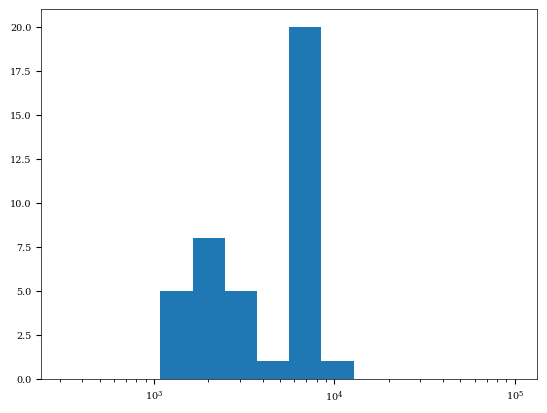

In [ ]:
bins = np.logspace(2.5,5,15)
plt.hist(mached_table['Model Luminosity'], bins = bins)
plt.xscale('log')

In [ ]:
def filter_fluxes(fluxes):
    #return fluxes[0, 6, 10, 11, 12, 13]
    return [fluxes[0], fluxes[6], fluxes[10], fluxes[11], fluxes[12]]

In [ ]:
fluxes_filtered = filter_fluxes(get_SED(3734, 433, F480M, hdul_list))
wavelengths_filtered = [
1.50,
3.60,
4.80, 
7.70,
12.80,
]
flux_err = np.array(fluxes_filtered)*0.01
apertures = [700/8100]*len(wavelengths_filtered)

In [ ]:
data = np.vstack([wavelengths_filtered, fluxes_filtered, flux_err, apertures]).T

In [ ]:
cb26tbl = Table(rows=data,
                names=['wavelength', 'flux', 'eflux', 'aperture'],
                units=(u.um, u.mJy, u.mJy, u.arcsec)
               )
cb26tbl

<Table length=5>
wavelength        flux               eflux              aperture     
    um            mJy                 mJy                arcsec      
 float64        float64             float64             float64      
---------- ------------------ ------------------- -------------------
       1.5 3.1852450370788574 0.03185245022177696 0.08641975308641975
       3.6  51.32530975341797  0.5132530927658081 0.08641975308641975
       4.8  88.08562469482422  0.8808562159538269 0.08641975308641975
       7.7  60.85514831542969  0.6085514426231384 0.08641975308641975
      12.8  88.79034423828125  0.8879034519195557 0.08641975308641975

In [ ]:
from table_loading import fit_a_source, geometries

In [ ]:
geometries = ['s-pbhmi', 's-pbsmi',
              'sp--h-i', 's-p-hmi',
              'sp--hmi', 'sp--s-i',
              's-p-smi', 'sp--smi',
              'spubhmi', 'spubsmi',
              'spu-hmi', 'spu-smi',
              's---s-i', 's---smi',
              's-ubhmi', 's-ubsmi',
              's-u-hmi', 's-u-smi']

In [ ]:
from dust_extinction.parameter_averages import F19
from dust_extinction.averages import CT06_MWLoc
from sedfitter.extinction import Extinction
from astroquery.svo_fps import SvoFps
from astropy import table
from sedfitter.filter import Filter
from sedfitter.source import Source
from sedfitter import fit, Fitter

In [ ]:
def get_filters(hemisphere='south'):
    # these are the official filternames on SVO_FPS
    if hemisphere == 'north':
        filternames = ['UKIRT/UKIDSS.J', 'UKIRT/UKIDSS.H', 'UKIRT/UKIDSS.K',
                   'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4', 'Spitzer/MIPS.24mu',
                   'Herschel/Pacs.blue', 'Herschel/Pacs.red', 'Herschel/SPIRE.PSW', 'Herschel/SPIRE.PMW', 'Herschel/SPIRE.PLW'
                  ]
        # keep only the non "_ext" SPIRE filters (but we should look up which is more appropriate)
        spire_filters = SvoFps.get_filter_list(facility='Herschel', instrument='Spire')
        spire_filters = spire_filters[['_ext' not in fid for fid in spire_filters['filterID']]]

        filter_meta = table.vstack([SvoFps.get_filter_list(facility='UKIRT', instrument='WFCAM'),
                                SvoFps.get_filter_list(facility='Spitzer', instrument='IRAC'),
                                SvoFps.get_filter_list(facility='Spitzer', instrument='MIPS')[0],
                                SvoFps.get_filter_list(facility='Herschel', instrument='Pacs'),
                                spire_filters,
                               ])

    elif hemisphere == 'south':
        filternames = ['Paranal/VISTA.Y', 'Paranal/VISTA.Z', 'Paranal/VISTA.J', 'Paranal/VISTA.H', 'Paranal/VISTA.Ks',
                   'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4', 'Spitzer/MIPS.24mu',
                   'Herschel/Pacs.blue', 'Herschel/Pacs.red', 'Herschel/SPIRE.PSW', 'Herschel/SPIRE.PMW', 'Herschel/SPIRE.PLW'
                  ]
        # keep only the non "_ext" SPIRE filters (but we should look up which is more appropriate)
        spire_filters = SvoFps.get_filter_list(facility='Herschel', instrument='Spire')
        spire_filters = spire_filters[['_ext' not in fid for fid in spire_filters['filterID']]]

        filter_meta = table.vstack([SvoFps.get_filter_list(facility='Paranal', instrument='VIRCAM'),
                                SvoFps.get_filter_list(facility='Spitzer', instrument='IRAC'),
                                SvoFps.get_filter_list(facility='Spitzer', instrument='MIPS')[0],
                                SvoFps.get_filter_list(facility='Herschel', instrument='Pacs'),
                                spire_filters,
                               ])

    zpts = {filtername: filter_meta[filter_meta['filterID']==filtername]['ZeroPoint'] for filtername in filternames}

    filtercurves = {filtername: SvoFps.get_transmission_data(filtername) for filtername in filternames}
    wavelengths = [np.average(filtercurves[filtername]['Wavelength'],
                              weights=filtercurves[filtername]['Transmission'])
                  for filtername in filternames]
    wavelength_dict = {filtername: np.average(filtercurves[filtername]['Wavelength'],
                                              weights=filtercurves[filtername]['Transmission'])*u.AA
                       for filtername in filternames}

    filterfreqs = {filtername: u.Quantity(filtercurves[filtername]['Wavelength'], u.AA).to(u.Hz, u.spectral()) for filtername in filternames}
    filtertrans = {filtername: np.array(filtercurves[filtername]['Transmission'])[np.argsort(filterfreqs[filtername])]
                  for filtername in filternames}
    filterfreqs = {filtername: np.sort(filterfreqs[filtername]) for filtername in filternames}

    sed_filters = [Filter(name=filtername,
                          central_wavelength=wl*u.AA,
                          nu=filterfreqs[filtername],
                          response=filtertrans[filtername])
                   for filtername, wl in zip(filternames, wavelengths)]


    # Add in the custom ALMA-IMF filters
    almaimf_bandends_1mm = [[216.10085679, 216.36181569],
                            [217.05104378, 217.31175857],
                            [219.90488464, 220.04866835],
                            [218.13102322, 218.39222624],
                            [219.51976276, 219.66379059],
                            [230.31532951, 230.81137113],
                            [231.06503709, 231.56181105],
                            [231.52507012, 233.42623749]]*u.GHz
    nu_1mm = np.linspace(almaimf_bandends_1mm.min(), almaimf_bandends_1mm.max(), 5000)
    response_1mm = np.zeros(nu_1mm.size, dtype='bool')
    for start, stop in almaimf_bandends_1mm:
        response_1mm |= (nu_1mm > start) & (nu_1mm < stop)
    sed_filters.append(Filter(name='ALMA-IMF_1mm',
                              central_wavelength=(228.15802*u.GHz).to(u.mm, u.spectral()),
                              nu=nu_1mm,
                              response=response_1mm.astype(float),
                             ))

    for filterfunc in sed_filters:
        filterfunc.normalize()


    almaimf_bandends_3mm = [[ 93.13410936,  93.25141259],
                            [ 91.75059068,  92.68755174],
                            [102.15273354, 103.0896946 ],
                            [104.55323851, 105.49019957]]*u.GHz
    nu_3mm = np.linspace(almaimf_bandends_3mm.min(), almaimf_bandends_3mm.max(), 5000)
    response_3mm = np.zeros(nu_3mm.size, dtype='bool')
    for start, stop in almaimf_bandends_3mm:
        response_3mm |= (nu_3mm > start) & (nu_3mm < stop)
    sed_filters.append(Filter(name='ALMA-IMF_3mm',
                              central_wavelength=(99.68314596*u.GHz).to(u.mm, u.spectral()),
                              nu=nu_3mm,
                              response=response_3mm.astype(float),
                             ))

    wavelength_dict['ALMA-IMF_1mm'] = (228.15802*u.GHz).to(u.um, u.spectral())
    wavelength_dict['ALMA-IMF_3mm'] = (99.68314596*u.GHz).to(u.um, u.spectral())

    return sed_filters, wavelength_dict, filternames, zpts

In [ ]:
def make_extinction():
    # make an extinction law
    ext = F19(3.1)
    ext2 = CT06_MWLoc()

    # https://arxiv.org/abs/0903.2057
    # 1.34 is from memory
    guyver2009_avtocol = (2.21e21 * u.cm**-2 * (1.34*u.Da)).to(u.g/u.cm**2)
    ext_wav = np.sort((np.geomspace(0.301, 8.699, 1000)/u.um).to(u.um, u.spectral()))
    ext_vals = ext.evaluate(ext_wav, Rv=3.1)

    # extend the extinction curve out
    ext_wav2 = np.geomspace(ext_wav.max(), 27*u.um, 100)
    ext_vals2 = ext2.evaluate(ext_wav2)

    extinction = Extinction()
    extinction.wav = np.hstack([ext_wav, ext_wav2])
    extinction.chi = np.hstack([ext_vals, ext_vals2]) / guyver2009_avtocol

    return extinction

In [ ]:
def fit_a_source(data, error, valid, geometry='s-ubhmi',
        robitaille_modeldir='/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/',
        extinction=make_extinction(), filters=get_filters(),
        aperture_size=3*u.arcsec, distance_range=[1.8, 2.2]*u.kpc,
        av_range=[4,40], fitter=None, stash_to_mmap=False,):

    source = Source()
    source.valid = valid

    # https://sedfitter.readthedocs.io/en/stable/data.html
    # this site specifies that the fitter expects flux in mJy
    # if the data are given as a Jy-equivalent, convert them to mJy
    source.flux = u.Quantity(data, u.mJy).value
    source.error =  u.Quantity(error, u.mJy).value

    if fitter is None:
        fitter = get_fitter(geometry=geometry, aperture_size=aperture_size,
                            distance_range=distance_range, av_range=av_range,
                            robitaille_modeldir=robitaille_modeldir,
                            filters=filters, extinction=extinction)

    # Run the fitting
    fitinfo = fitter.fit(source)

    if stash_to_mmap:
        from tempfile import mkdtemp
        import os.path as path
        filename = path.join(mkdtemp(), f'{geometry}.dat')
        fp = np.memmap(filename, dtype='float32', mode='w+', shape=fitinfo.model_fluxes.shape)
        fp[:] = fitinfo.model_fluxes[:]
        fp.flush()
        fitinfo.model_fluxes = fp
        print(f"Moved array with size {fitinfo.model_fluxes.shape} to {fp.filename}")

    return fitinfo

In [ ]:
def get_fitter(geometry, aperture_size,
               distance_range,
               robitaille_modeldir,
               filters, extinction,
               av_range):

    # Define path to models
    model_dir = f'{robitaille_modeldir}/{geometry}'

    if len(aperture_size) == 1:
        apertures = u.Quantity([aperture_size]*len(filters))
    else:
        apertures = u.Quantity(aperture_size, u.arcsec)

    if isinstance(filters, list):
        filters = np.array(filters)

    fitter = Fitter(filter_names=filters,
                    apertures=apertures,
                    model_dir=model_dir,
                    extinction_law=extinction,
                    distance_range=distance_range,
                    av_range=av_range,
                    use_memmap=True
                   )

    return fitter

In [ ]:
fits = {geom:
        fit_a_source(data=cb26tbl['flux'].quantity,
             error=cb26tbl['eflux'].quantity,
             valid=np.ones(len(cb26tbl)), aperture_size=cb26tbl['aperture'].quantity,
             filters=cb26tbl['wavelength'].quantity,
                   av_range=[15,30],
                   distance_range=[8000,8100]*u.pc,
                     geometry=geom,
                     stash_to_mmap=True
                  )
        for geom in geometries}#['spubhmi']} #geometries}
fit_dict = fits

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbhmi
   Log[d] stepping     :  0.02
   Number of distances :  2

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(90000, 2, 5).  use_memmap=True
   Reading fluxes at 1.5 um
   Reading fluxes at 3.6 um
   Reading fluxes at 4.8 um
   Reading fluxes at 7.7 um
   Reading fluxes at 12.8 um
Moved array with size (90000, 5) to /scratch/local/57607227/tmp0sil42m4/s-pbhmi.dat
 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbsmi
   Log[d] stepping     :  0.02
   Number of distances :  2

 ------------------------------------------------------------
  => Reading in convolved flux

In [ ]:
minchi2 = min([np.nanmin(fits[geom].chi2) for geom in fits])
minchi2

<Quantity 1167.25100656>

In [ ]:
chi2limit = minchi2*3 if minchi2 > 3 else 9
deltachi2limit = chi2limit - minchi2

In [ ]:
print(f"Delta-chi^2 = {deltachi2limit} for min chi2 = {minchi2}")

Delta-chi^2 = 2334.5020131250185 for min chi2 = 1167.2510065625092


In [ ]:
import importlib as imp, table_loading

In [ ]:
import plot_fit
imp.reload(plot_fit)
from plot_fit import plot_fit, datafunction

In [ ]:
plt.style.use('dark_background')
plt.rcParams['font.size'] = 16

Figure /blue/adamginsbug/adamginsburg/SPICY_ALMAIMF//Location_figures/CB26/None.png doesn't exist


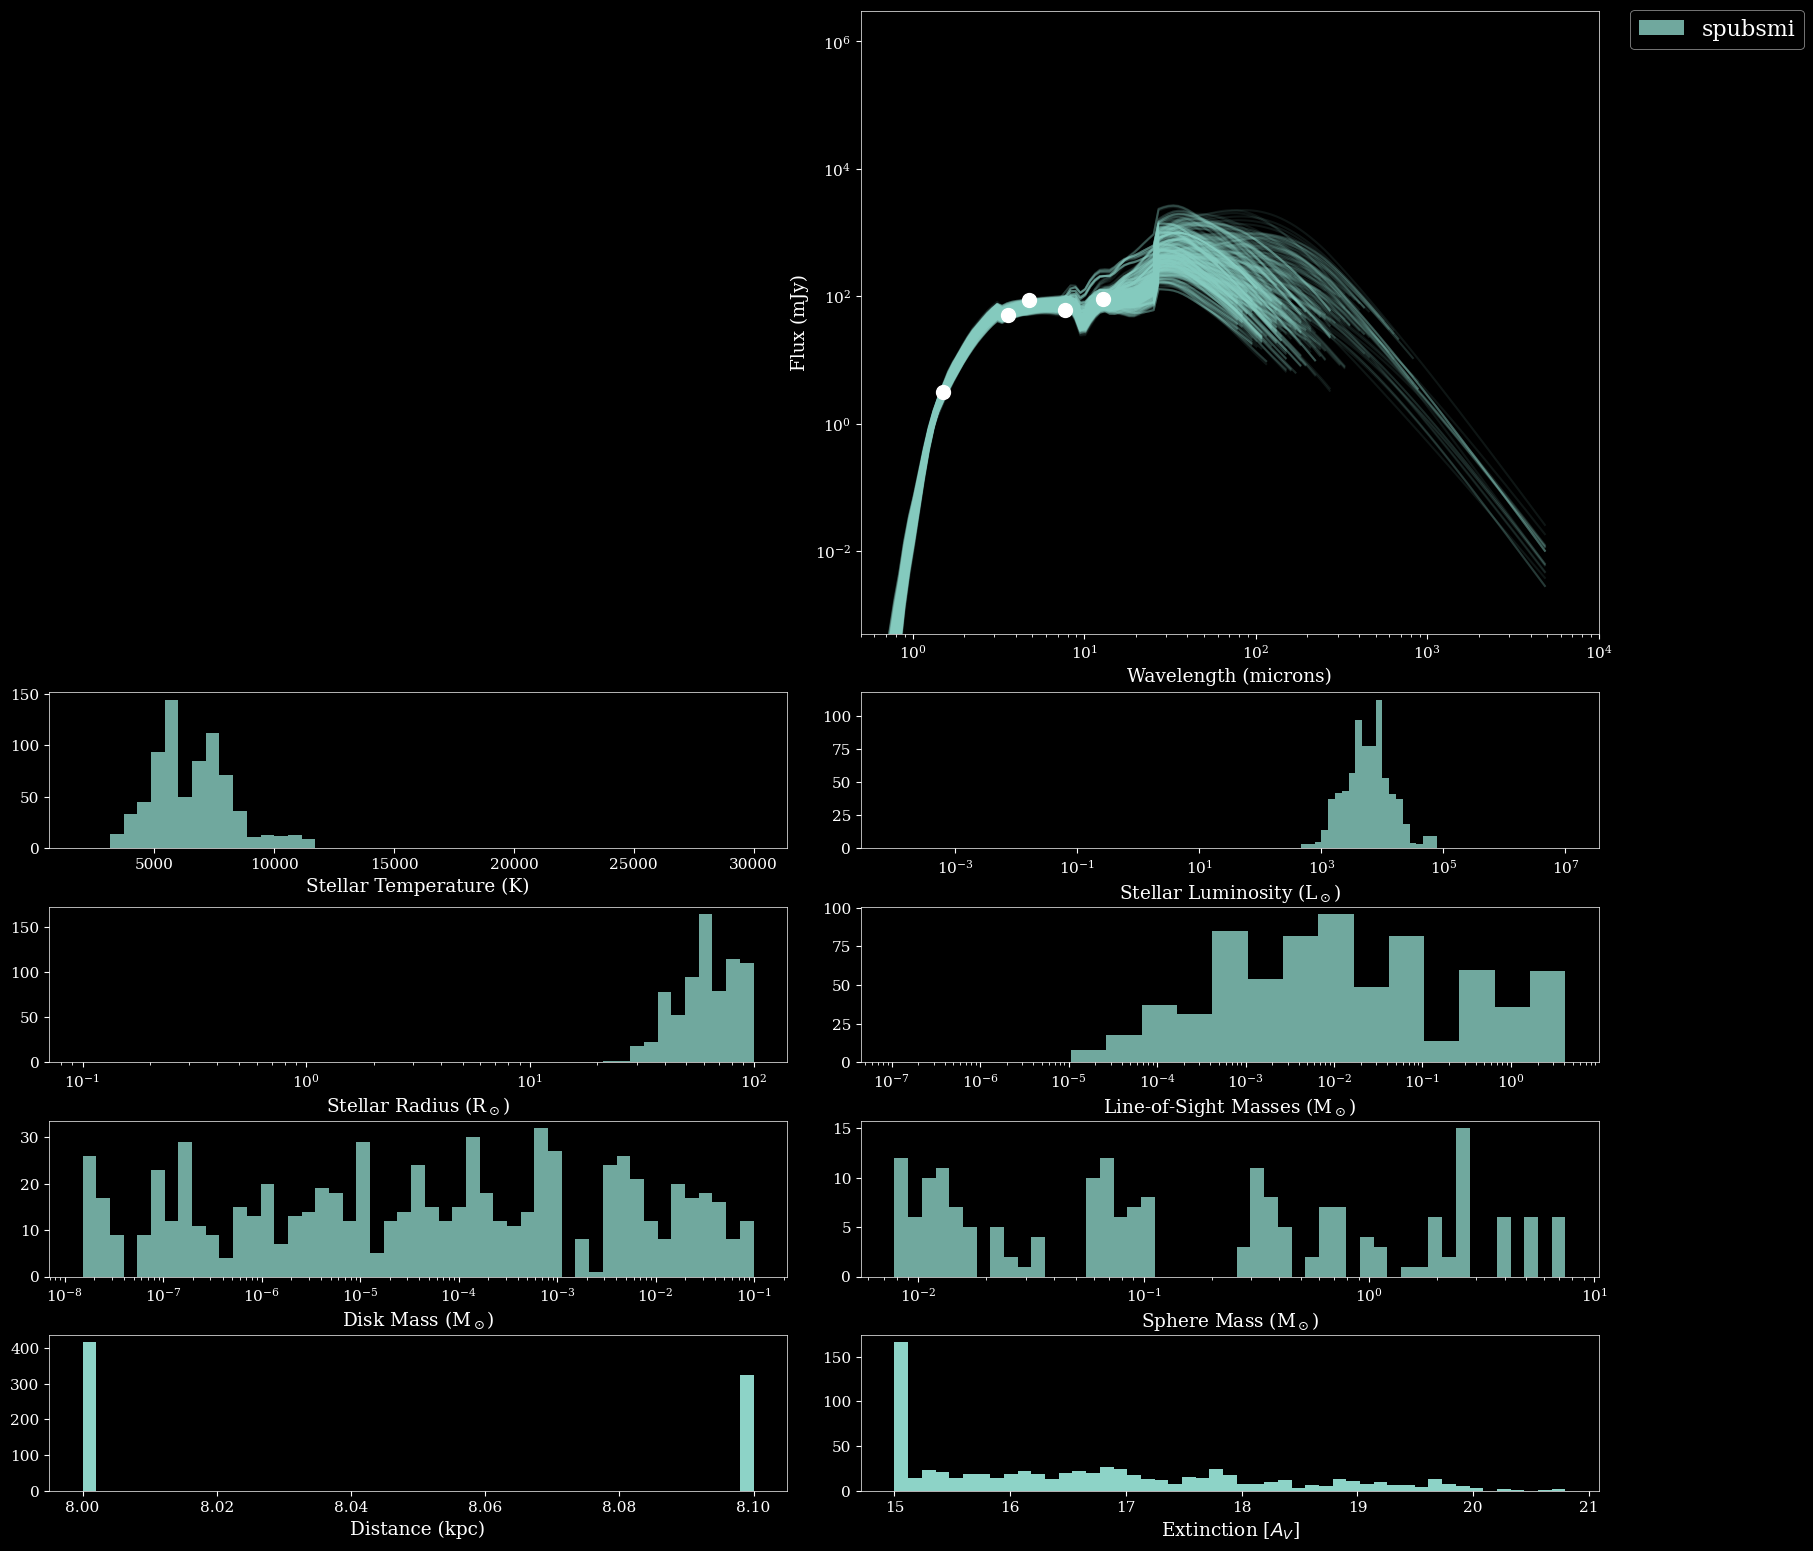

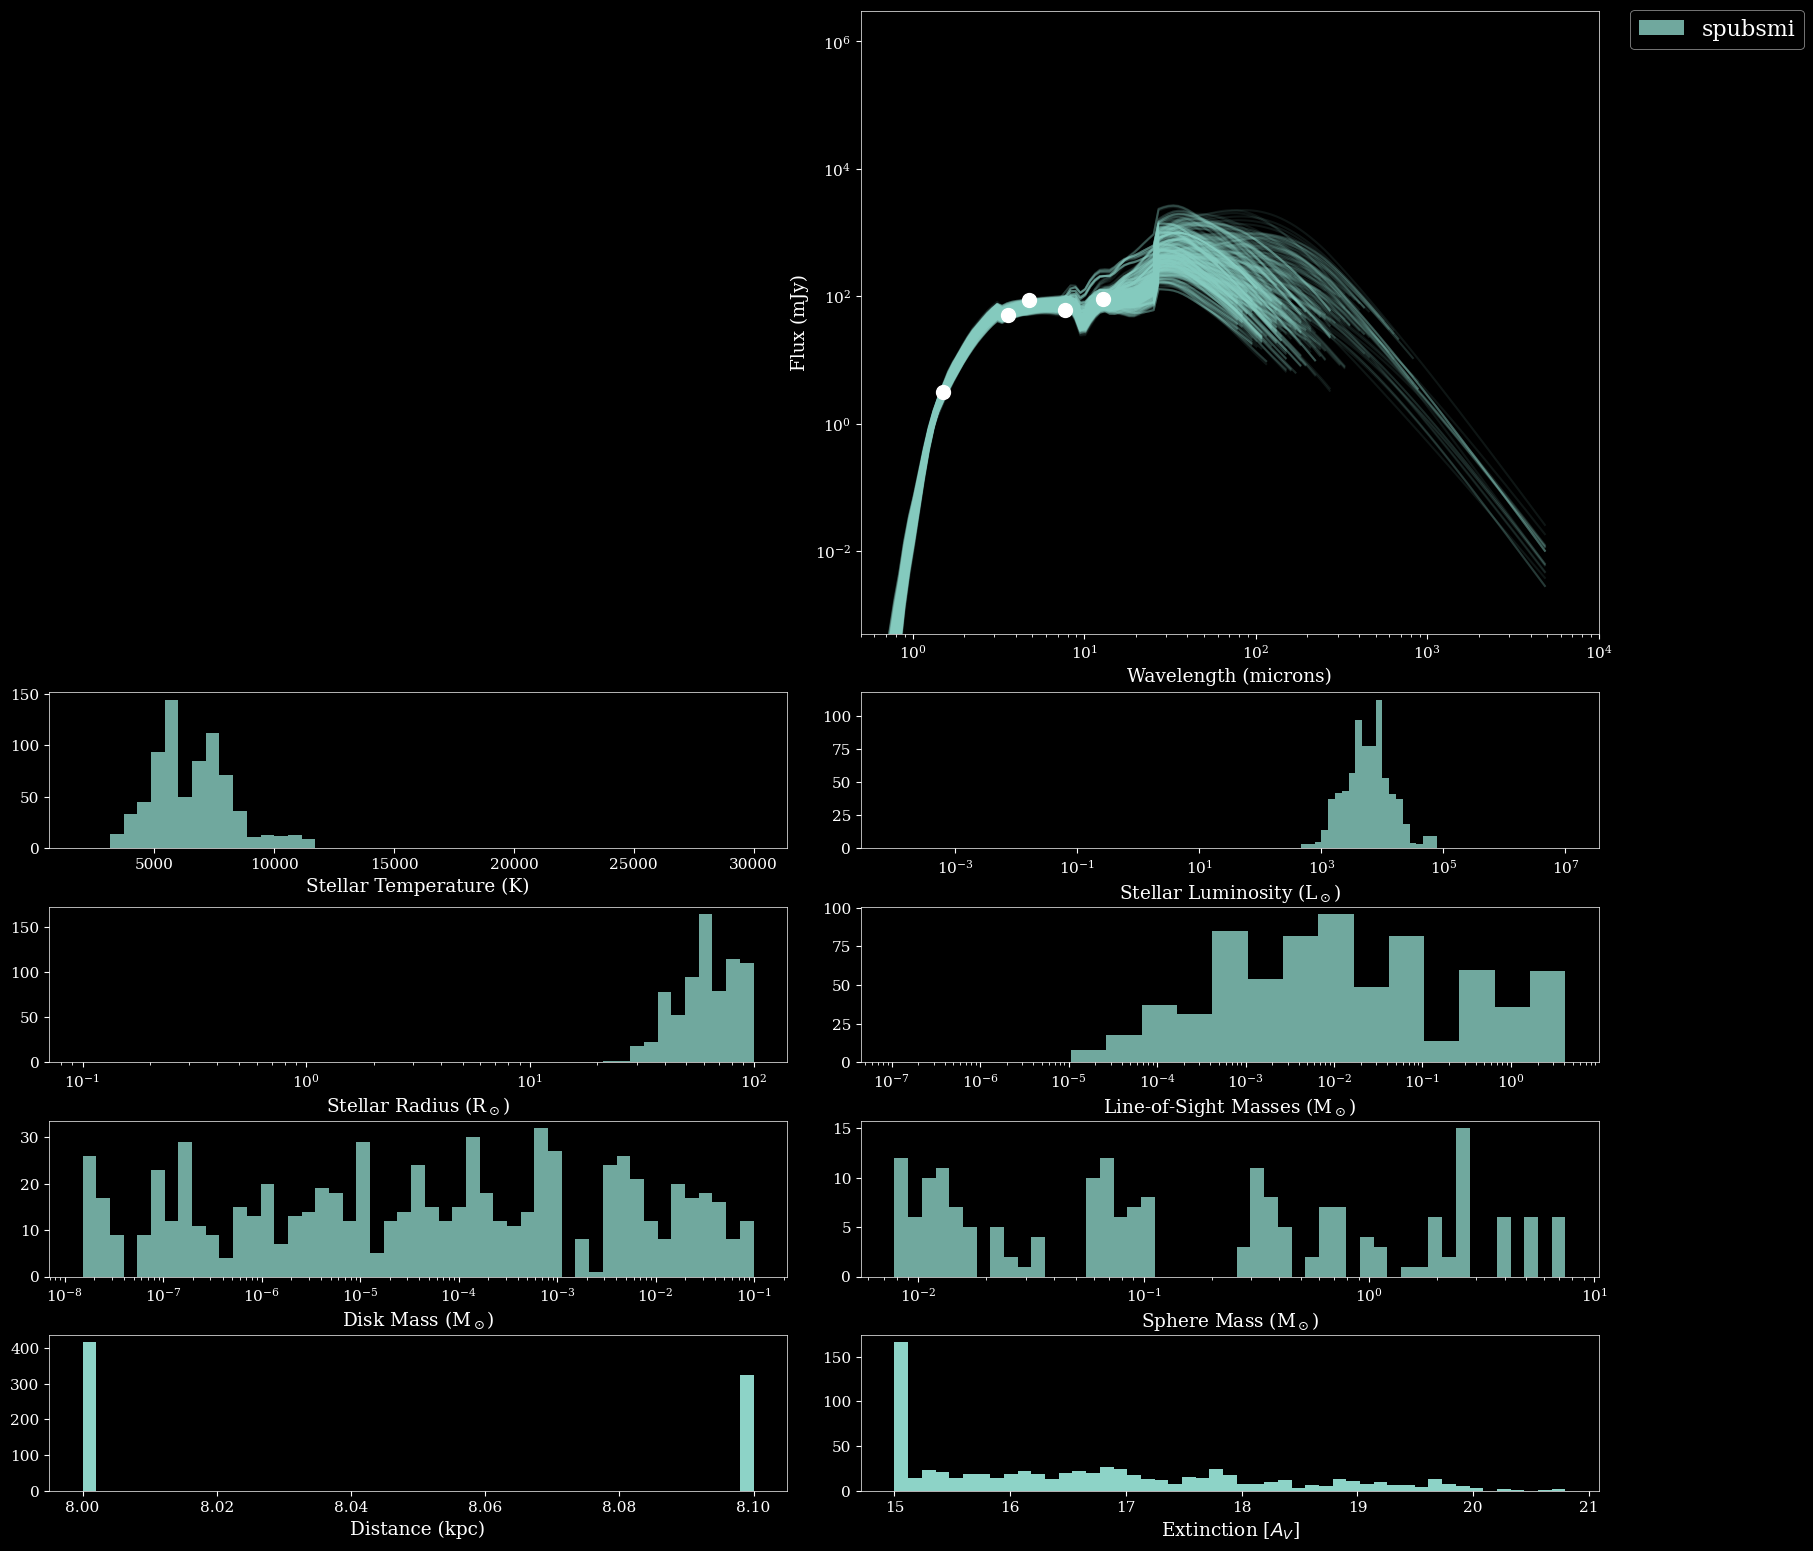

In [ ]:
fit = fits['spubsmi']
plot_fit({'spubsmi': fit}, ['spubsmi'], fieldid='CB26', chi2limit=chi2limit, min_chi2=minchi2, show_all_models=True)

Figure /blue/adamginsbug/adamginsburg/SPICY_ALMAIMF//Location_figures/CB26/None.png doesn't exist


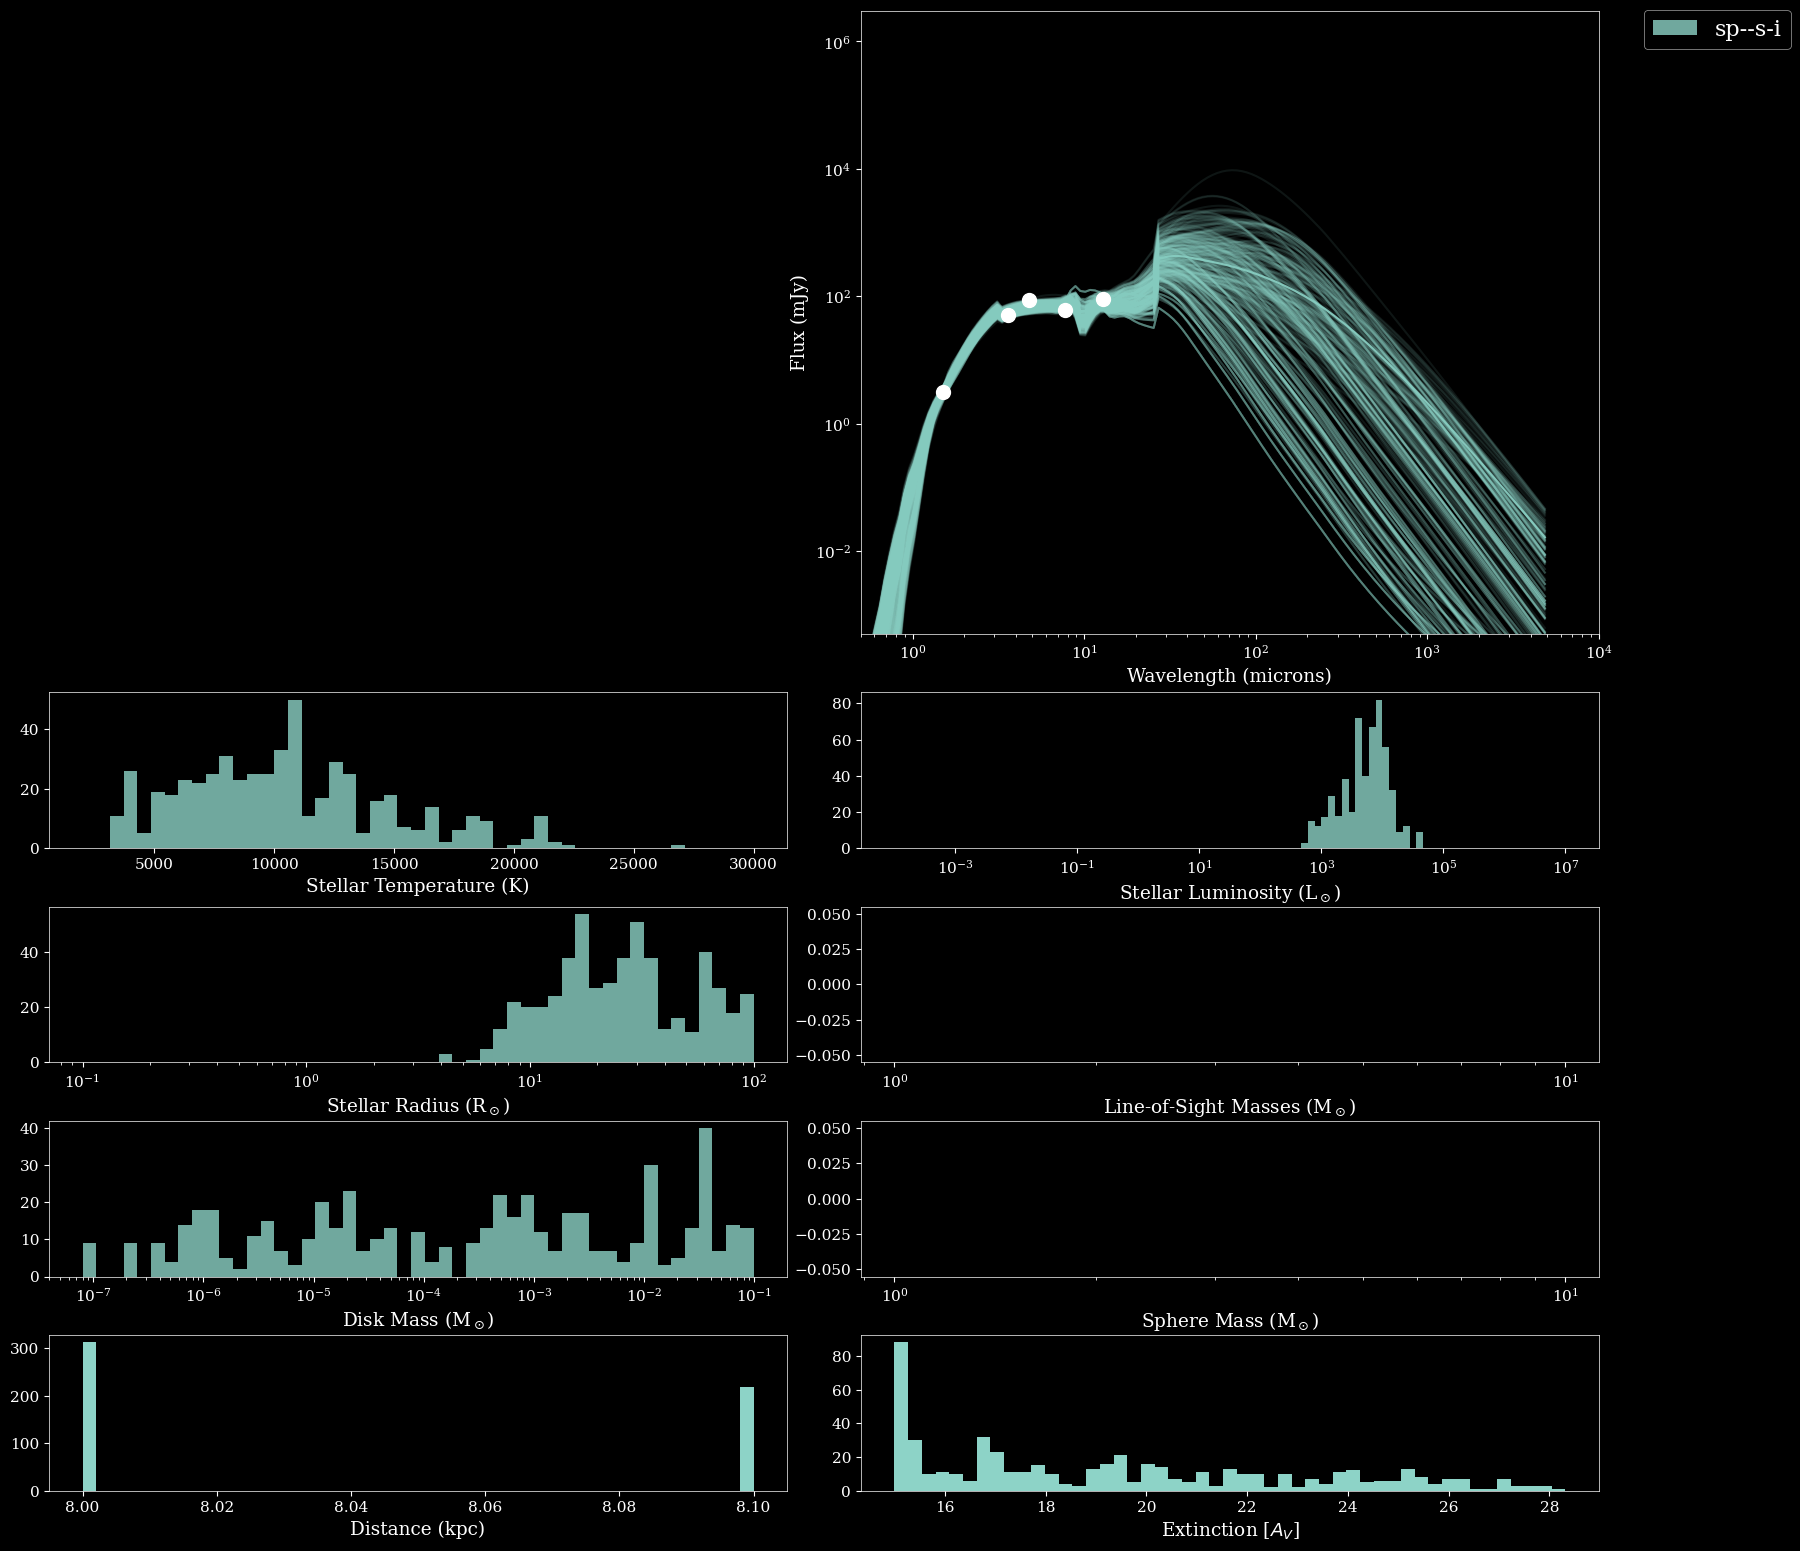

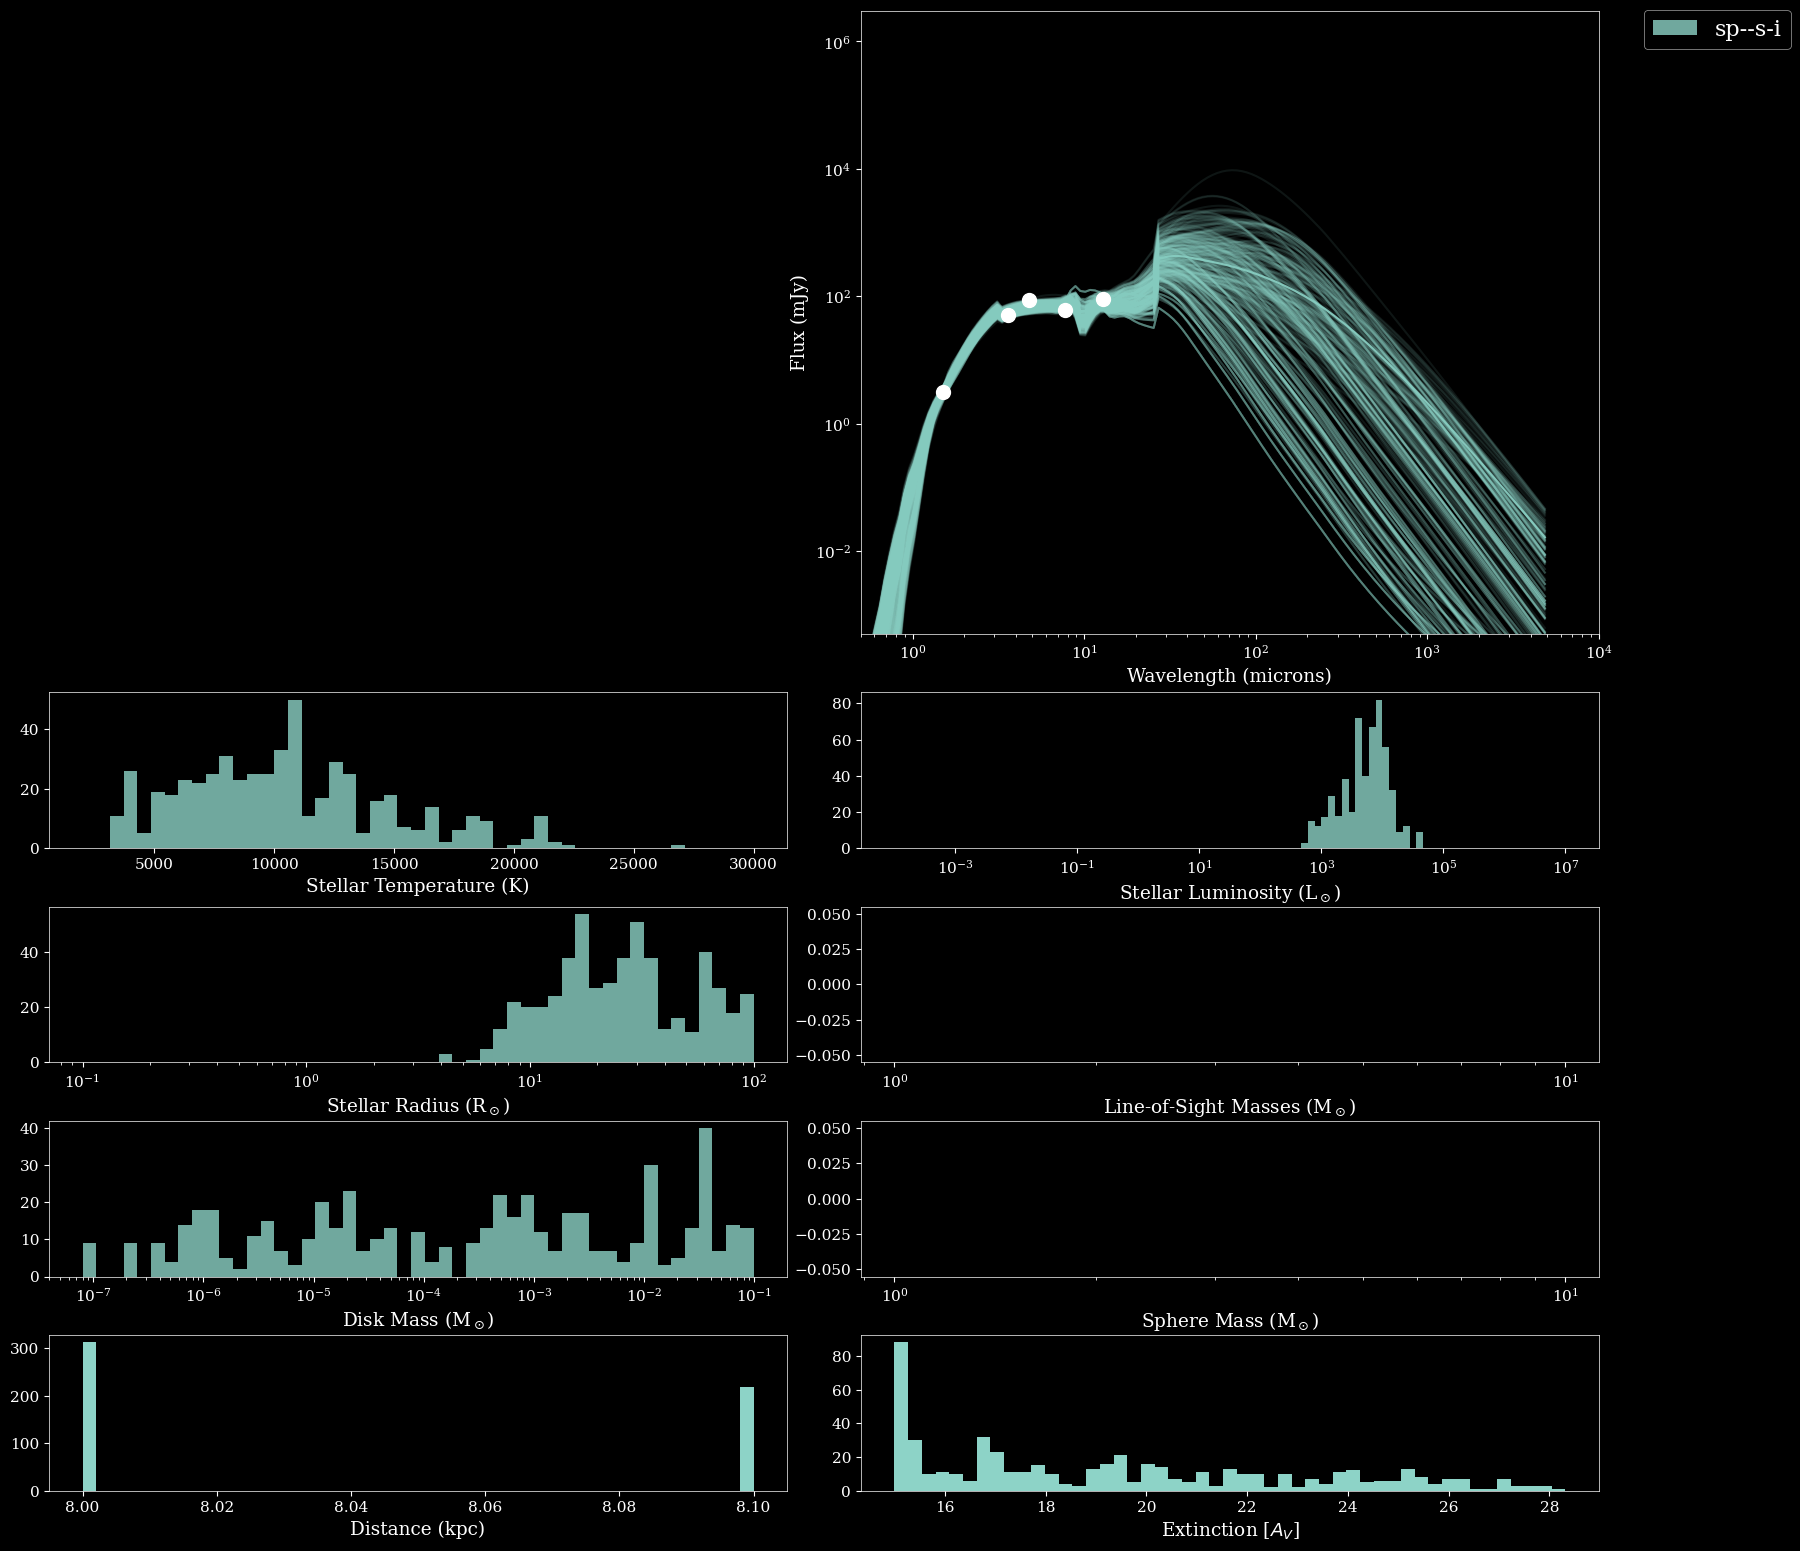

In [ ]:
geo = 'sp--s-i'
fit = fits[geo]
plot_fit({geo: fit}, [geo], chi2limit=chi2limit, fieldid='CB26', show_all_models=True, min_chi2=minchi2)

Figure /blue/adamginsbug/adamginsburg/SPICY_ALMAIMF//Location_figures/CB26/None.png doesn't exist


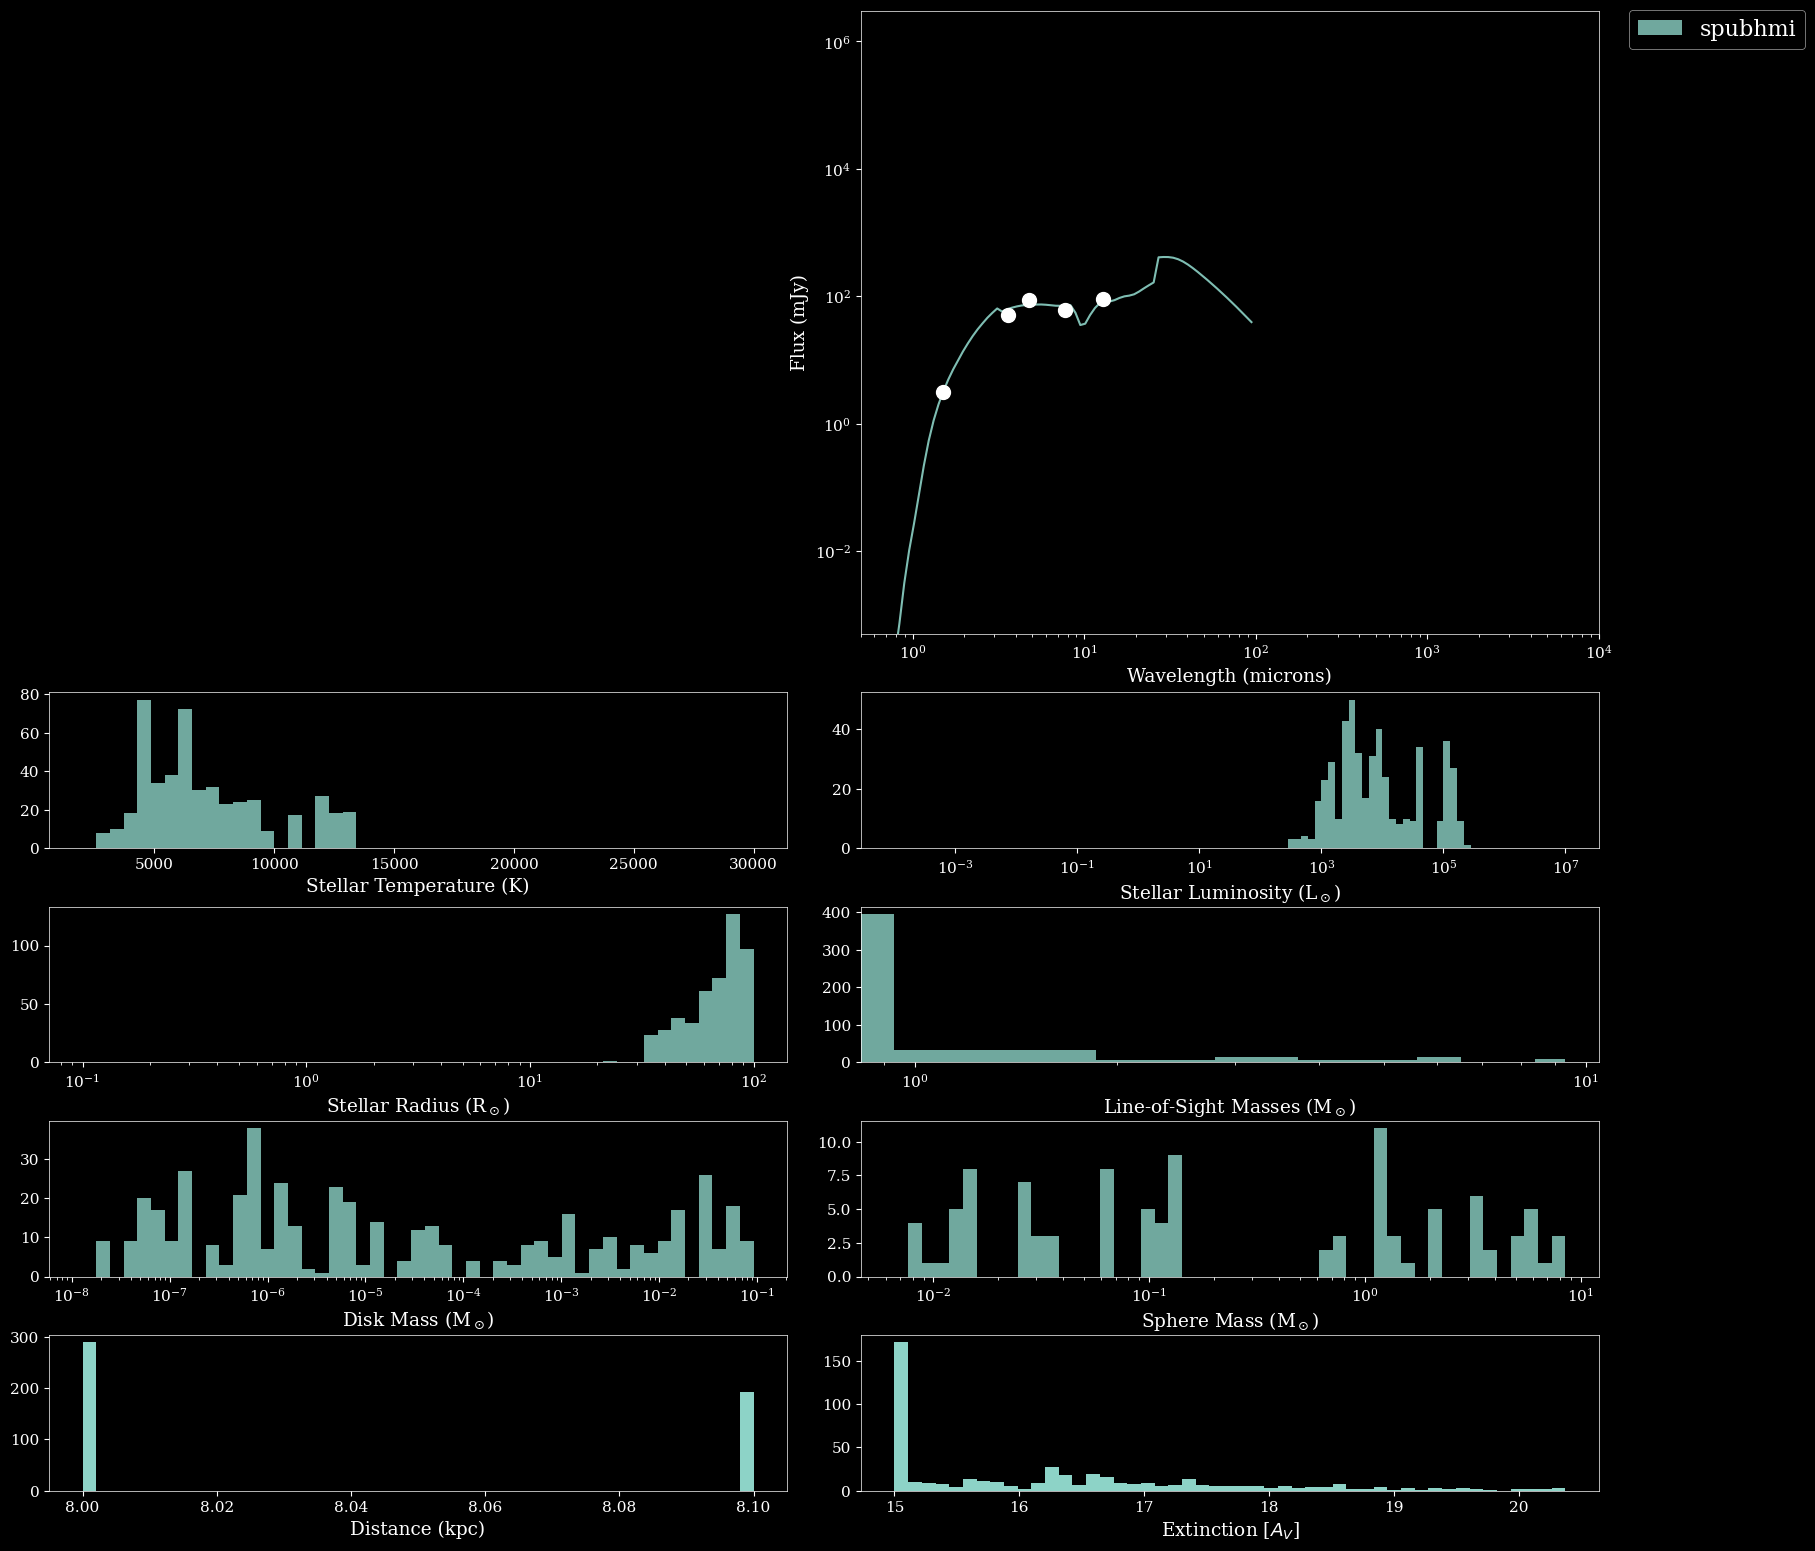

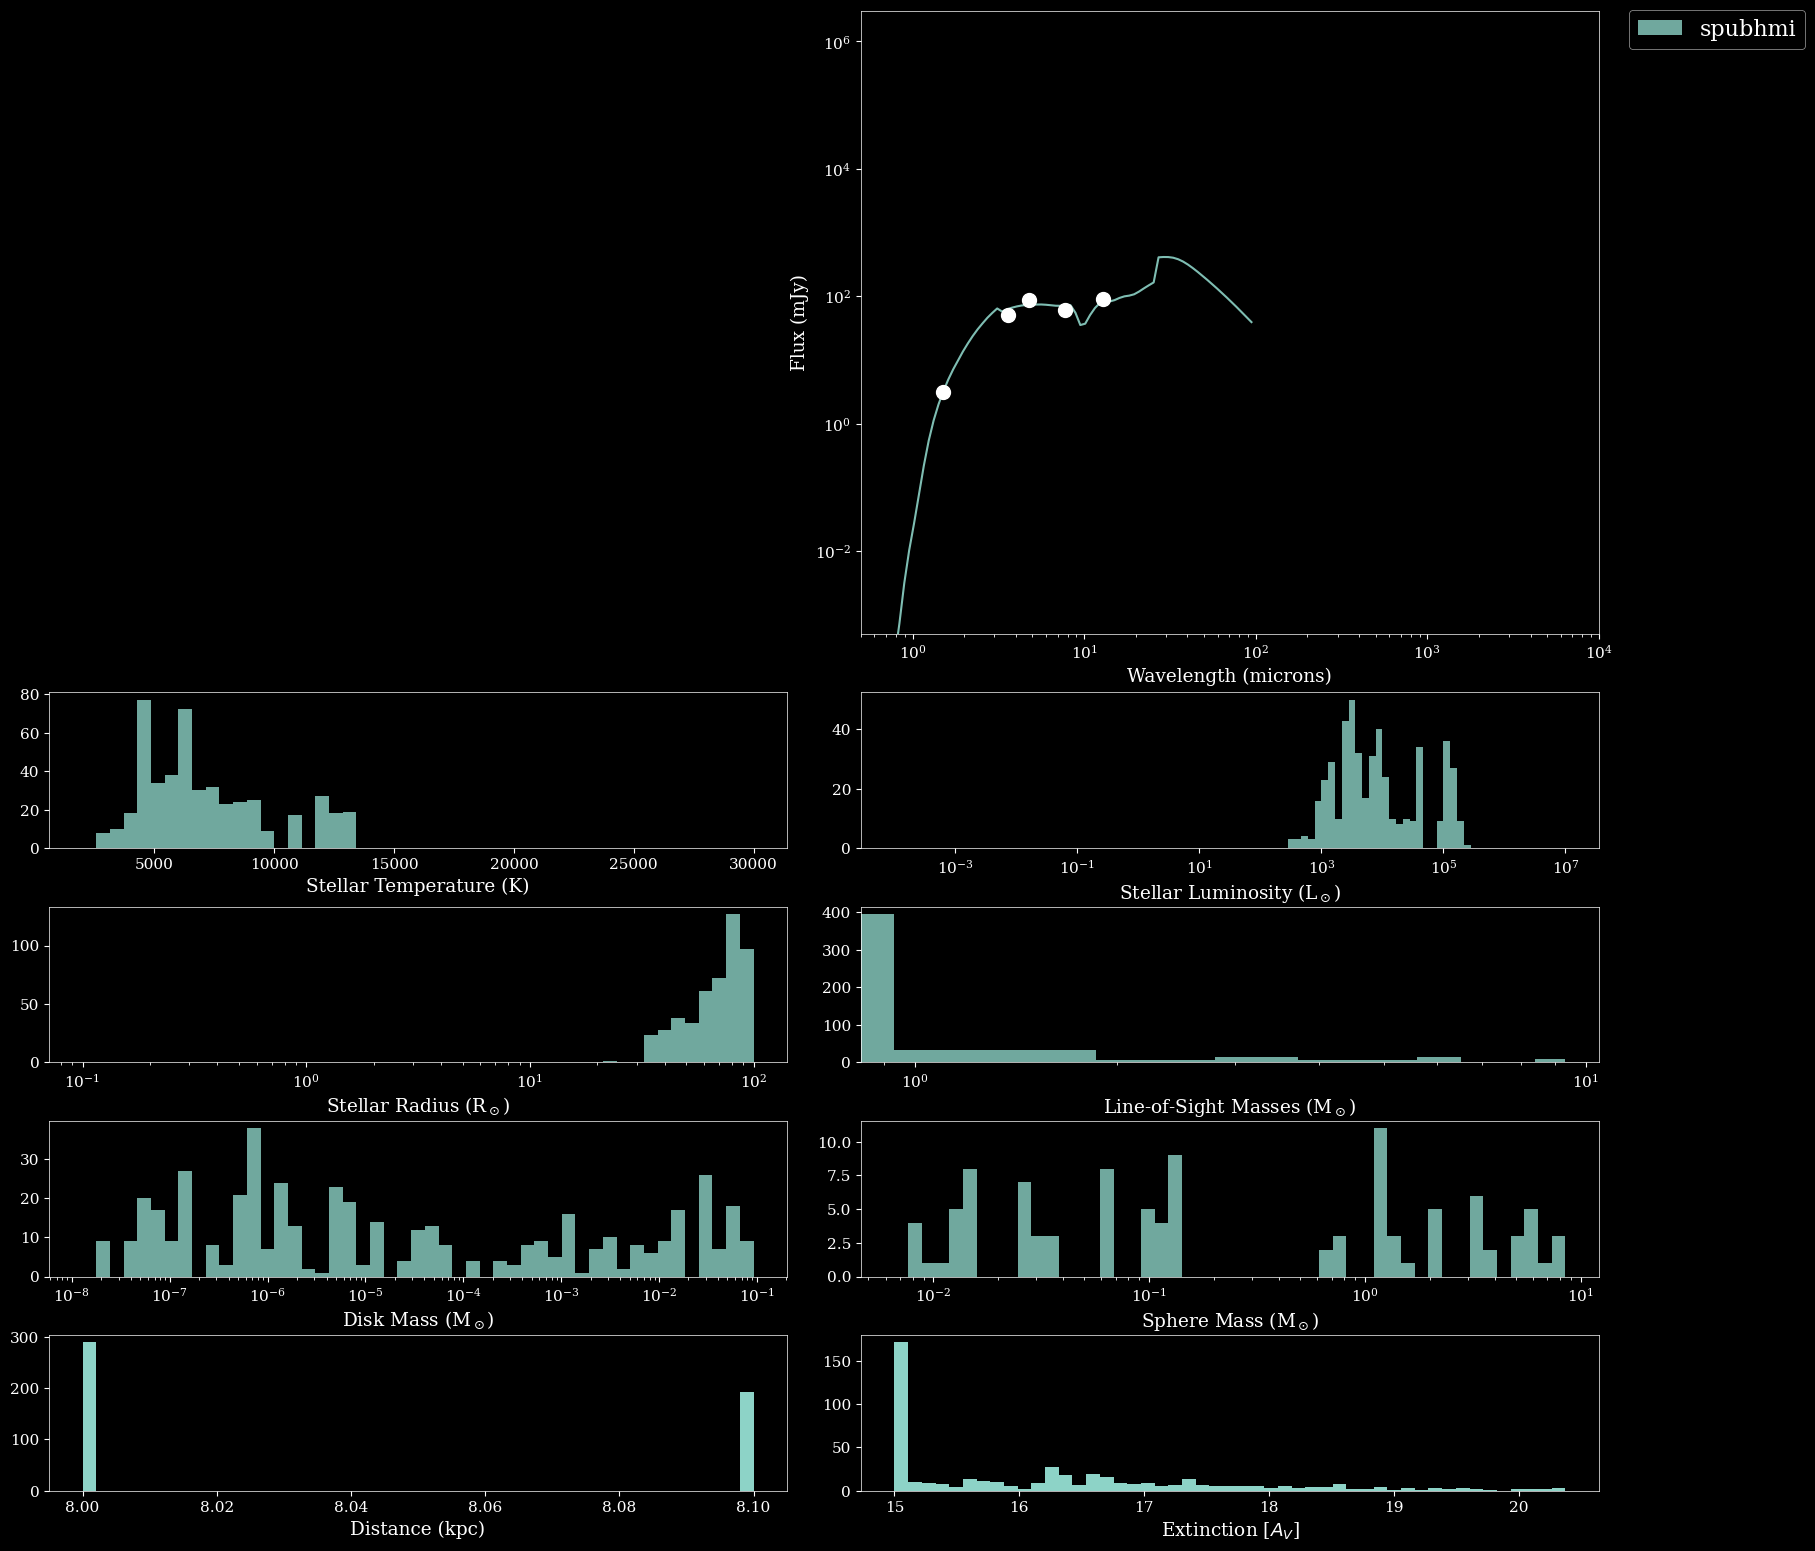

In [ ]:
plot_fit(fits, ['spubhmi'], chi2limit=chi2limit, min_chi2=minchi2, fieldid='CB26',)

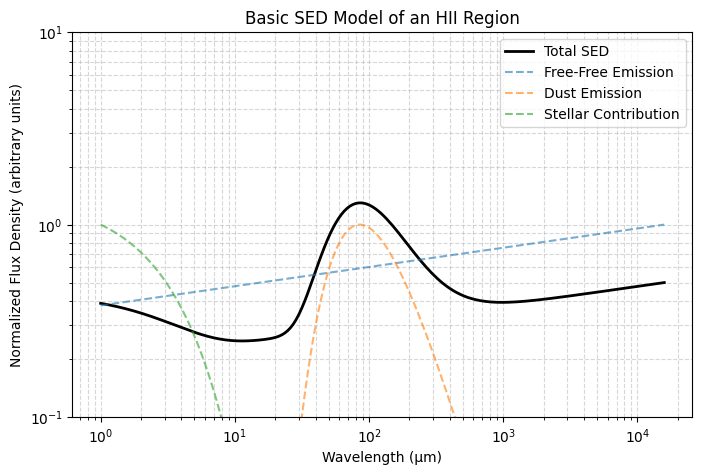

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define wavelength range (in microns)
wavelength = np.logspace(0, 4.2, 200)  # 1 to 3000 microns

# Free-free emission (power law: S_nu ∝ ν^(-0.1) in optically thin regime)
nu = 3e14 / wavelength  # Frequency in Hz (approx conversion: c / lambda)
S_ff = nu**(-0.1)  

# Dust emission (Modified blackbody with T_d ~ 50 K)
h = 6.626e-34  # Planck's constant (J s)
c = 3e8        # Speed of light (m/s)
k = 1.381e-23  # Boltzmann constant (J/K)
T_d = 50       # Dust temperature in K
beta = 1.5     # Dust emissivity index

B_lambda = (2*h*c**2 / (wavelength*1e-6)**5) / (np.exp(h*c / (wavelength*1e-6 * k * T_d) ) - 1)
S_dust = B_lambda * (wavelength / 100)**beta  # Adding emissivity dependence

# Stellar component (Approximate as a power law in near-IR)
S_star = np.exp(-wavelength / 3)  # Exponential drop-off beyond a few microns

# Normalize and combine components
S_ff /= S_ff.max()
S_dust /= S_dust.max()
S_star /= S_star.max()

# Total SED (weighted sum)
SED = 0.5 * S_ff + 1.0 * S_dust + 0.2 * S_star

# Plot the SED
plt.figure(figsize=(8, 5))
plt.loglog(wavelength, SED, label="Total SED", color='k', lw=2)
plt.loglog(wavelength, S_ff, '--', label="Free-Free Emission", alpha=0.6)
plt.loglog(wavelength, S_dust, '--', label="Dust Emission", alpha=0.6)
plt.loglog(wavelength, S_star, '--', label="Stellar Contribution", alpha=0.6)

plt.ylim(1e-1, 1e1)

plt.xlabel("Wavelength (µm)")
plt.ylabel("Normalized Flux Density (arbitrary units)")
plt.title("Basic SED Model of an HII Region")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()


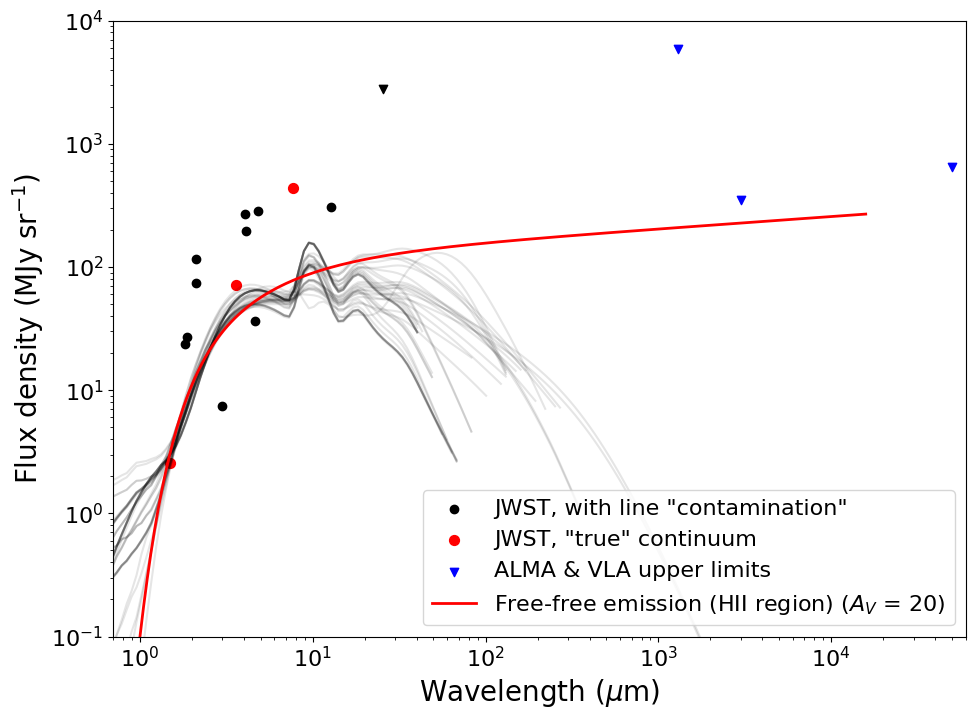

In [57]:

#plt.plot(seds.wav.value, seds_match[0,4])
fig = plt.figure(figsize=(11, 8))
fontsize = 20
[plt.plot(seds.wav.value, SED[4]/8.5**2, color = 'k', alpha = 0.1) for SED in seds_match]
plt.scatter(wavelengths[:-1], get_SED(4141, 1521, F480M, hdul_list)[:-1], color = 'k', label = 'JWST, with line "contamination"')
plt.scatter([1.5, 3.6, 7.7], [get_SED(4141, 1521, F480M, hdul_list)[0],get_SED(4141, 1521, F480M, hdul_list)[6],get_SED(4141, 1521, F480M, hdul_list)[11]], color = 'red', s = 50, label = 'JWST, "true" continuum')
#plt.scatter([1300, 3000], [sens_1mm.value, sens_3mm.value], color = 'blue', label = 'ALMA upper limits', marker = 'v')
plt.scatter([1300, 3000, 50000], [sens_1mm.value, sens_3mm.value, sens_VLA.value], color = 'blue', label = 'ALMA & VLA upper limits', marker = 'v')
plt.scatter(wavelengths[-1],get_SED(4141, 1521, F480M, hdul_list)[-1], color = 'k', marker = 'v')
#plt.plot(wavelength, SED, label="HII region model SED", color='k', lw=2)

A_V = 20  # Visual extinction
R_V = 3.1

# Compute extinction at each wavelength
#A_lambda = extinction.ccm89(wavelength, A_V, R_V)

# Apply extinction correction to the SED
#SED_extincted = SED * 10**(-0.4 * A_lambda)  # Flux is attenuated
SED = 0.5 * S_ff
SED_extincted = apply(extinction.fitzpatrick99((wavelength*u.um.to(u.angstrom)), A_V, R_V), SED)
plt.plot(wavelength, SED_extincted*10**2.73, label=f"Free-free emission (HII region) ($A_V$ = {A_V})", color='r', lw=2)
#SED = 0.5 * S_ff + 0.2 * S_star
#SED_extincted = apply(extinction.fitzpatrick99((wavelength*u.um.to(u.angstrom)), A_V, R_V), SED)
#plt.plot(wavelength, SED_extincted*10**2.5, label=f"HII region model SED ($A_V$ = {A_V}), S + D + FF", color='r', lw=2, linestyle = '--')
plt.loglog()
#plt.yscale('log')
plt.xlim(0.7,60000)
#plt.xlim(5,30)
plt.ylim(10**-1, 10**4)
plt.xlabel(r'Wavelength ($\mu$m)', fontsize=fontsize)
plt.ylabel('Flux density (MJy sr$^{-1}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize-4)
plt.legend(fontsize=fontsize-4, loc='lower right')
#plt.legend(fontsize=12, loc='lower left')
#plt.savefig('/orange/adamginsburg/jwst/sgrb2/NB/FINESST_SED.png', dpi=300, bbox_inches='tight')

In [58]:
wavelength_ff_thick = np.logspace(4, 4.2, 200)
S_ff_thick = nu**(2)
S_ff_thick /= S_ff_thick.max()

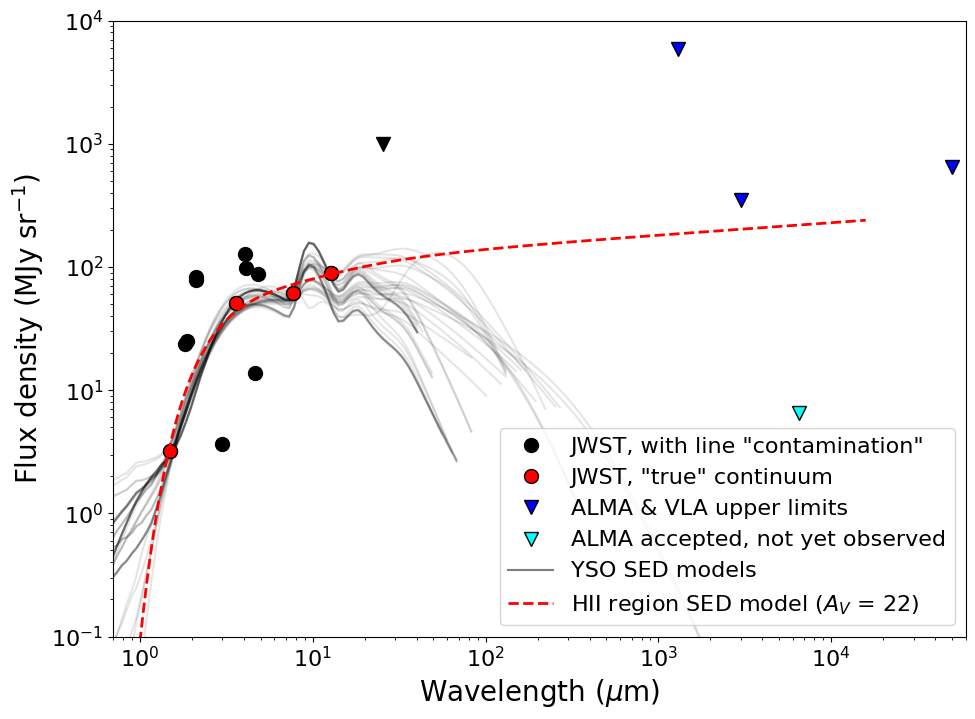

In [59]:
#plt.plot(seds.wav.value, seds_match[0,4])
fig = plt.figure(figsize=(11, 8))
fontsize = 20
[plt.plot(seds.wav.value, SED[4]/8.5**2, color = 'k', alpha = 0.1) for SED in seds_match]

plt.plot(wavelengths[:-1], get_SED(3734, 433, F480M, hdul_list)[:-1], mfc = 'k', marker = 'o', mec = 'k', linestyle = 'none', markersize= 10, label = 'JWST, with line "contamination"')
plt.plot([1.5, 3.6, 7.7, 12.80], [get_SED(3734, 433, F480M, hdul_list)[0],get_SED(3734, 433, F480M, hdul_list)[6],get_SED(3734, 433, F480M, hdul_list)[11],get_SED(3734, 433, F480M, hdul_list)[12]],marker = 'o', mfc = 'red', mec = 'k', markersize= 10, label = 'JWST, "true" continuum', linestyle = 'none')
#plt.scatter([1300, 3000], [sens_1mm.value, sens_3mm.value], color = 'blue', label = 'ALMA upper limits', marker = 'v')
plt.plot([1300, 3000, 50000], [sens_1mm.value, sens_3mm.value, sens_VLA.value], mfc = 'blue', mec='k', label = 'ALMA & VLA upper limits', marker = 'v', markersize= 10, linestyle = 'none')
plt.plot(6500, sens_VLA.value/100, mfc = 'cyan', marker = 'v', mec = 'k', linestyle = 'none', label = 'ALMA accepted, not yet observed', markersize= 10)
plt.plot(wavelengths[-1],get_SED(3734, 433, F480M, hdul_list)[-1], color = 'k', marker = 'v', markersize= 10, linestyle = 'none')
#plt.plot(wavelength, SED, label="HII region model SED", color='k', lw=2)

A_V = 22  # Visual extinction
R_V = 3.1

# Compute extinction at each wavelength
#A_lambda = extinction.ccm89(wavelength, A_V, R_V)

# Apply extinction correction to the SED
#SED_extincted = SED * 10**(-0.4 * A_lambda)  # Flux is attenuated
plt.plot([0,0], [1,1], color = 'k', alpha = 0.5, label = 'YSO SED models')
SED = 0.5 * S_ff
SED_extincted = apply(extinction.fitzpatrick99((wavelength*u.um.to(u.angstrom)), A_V, R_V), SED)
#plt.plot(wavelength, SED_extincted*10**2.73, label=f"Free-free emission (HII region) ($A_V$ = {A_V})", color='r', lw=2)
SED = 0.5 * S_ff + 0.2 * S_star
SED_extincted = apply(extinction.fitzpatrick99((wavelength*u.um.to(u.angstrom)), A_V, R_V), SED)
plt.plot(wavelength, SED_extincted*10**2.68, label=f"HII region SED model ($A_V$ = {A_V})", color='r', lw=2, linestyle = '--')
#plt.plot(wavelength_ff_thick, S_ff_thick*0.5*10**2.7, label="Free-Free Emission (Thick)", color='k', lw=2, linestyle = '-.')
plt.loglog()
#plt.yscale('log')
plt.xlim(0.7,60000)
#plt.xlim(5,30)
plt.ylim(10**-1, 10**4)
plt.xlabel(r'Wavelength ($\mu$m)', fontsize=fontsize)
plt.ylabel('Flux density (MJy sr$^{-1}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize-4)
plt.legend(fontsize=fontsize-4, loc='lower right')
#plt.legend(fontsize=12, loc='lower left')
#plt.savefig('/orange/adamginsburg/jwst/sgrb2/NB/FINESST_SED_with_ALMA.png', dpi=300, bbox_inches='tight')

In [60]:
import astropy.constants as c
wavs_temp = np.logspace(np.log10(0.7),np.log10(60000),100)
freqs = (c.c / (wavs_temp*u.um)).to(u.GHz)


In [61]:
import matplotlib.ticker as ticker

Set DATE-AVG to '2024-09-07T14:47:53.677' from MJD-AVG.
Set DATE-END to '2024-09-07T15:32:14.489' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.717158 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298812689.621 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T17:53:49.153' from MJD-AVG.
Set DATE-END to '2024-09-07T18:38:10.190' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.577917 from OBSGEO-[XYZ].
Set OBSGEO-H to 1297733228.988 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T16:21:01.359' from MJD-AVG.
Set DATE-END to '2024-09-07T17:05:17.716' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.647443 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298271102.952 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-07T11:59:42.775' from MJD-AVG.
Set DATE-END to '2024-09-07T13:59:11.263' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -4.939008 from OBSGEO-[XYZ].
Set OBSGEO-H to 1300551270.825 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

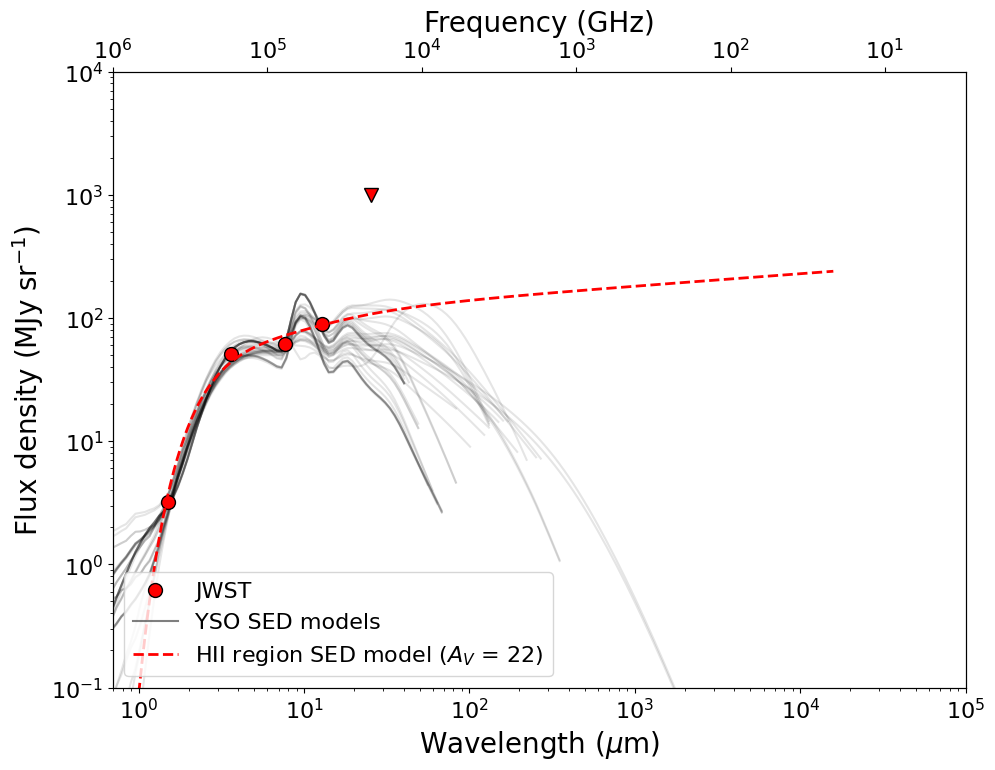

In [68]:
#plt.plot(seds.wav.value, seds_match[0,4])
fig = plt.figure(figsize=(11, 8))
fontsize = 20
[plt.plot(seds.wav.value, SED[4]/8.5**2, color = 'k', alpha = 0.1) for SED in seds_match]

#plt.plot(wavelengths[:-1], get_SED(3734, 433, F480M, hdul_list)[:-1], mfc = 'k', marker = 'o', mec = 'k', linestyle = 'none', markersize= 10, label = 'JWST, with line "contamination"')
plt.plot([1.5, 3.6, 7.7, 12.80], [get_SED(3734, 433, F480M, hdul_list)[0],get_SED(3734, 433, F480M, hdul_list)[6],get_SED(3734, 433, F480M, hdul_list)[11],get_SED(3734, 433, F480M, hdul_list)[12]],marker = 'o', mfc = 'red', mec = 'k', markersize= 10, label = 'JWST', linestyle = 'none')
#plt.scatter([1300, 3000], [sens_1mm.value, sens_3mm.value], color = 'blue', label = 'ALMA upper limits', marker = 'v')
#plt.plot([1300, 3000, 50000], [sens_1mm.value, sens_3mm.value, sens_VLA.value], mfc = 'blue', mec='k', label = 'ALMA & VLA upper limits', marker = 'v', markersize= 10, linestyle = 'none')
#plt.plot(6500, sens_VLA.value/100, mfc = 'cyan', marker = 'v', mec = 'k', linestyle = 'none', label = 'ALMA accepted, not yet observed', markersize= 10)
plt.plot(wavelengths[-1],get_SED(3734, 433, F480M, hdul_list)[-1], color = 'red',mec = 'k', marker = 'v', markersize= 10, linestyle = 'none')
#plt.plot(wavelength, SED, label="HII region model SED", color='k', lw=2)

A_V = 22  # Visual extinction
R_V = 3.1

# Compute extinction at each wavelength
#A_lambda = extinction.ccm89(wavelength, A_V, R_V)

# Apply extinction correction to the SED
#SED_extincted = SED * 10**(-0.4 * A_lambda)  # Flux is attenuated
plt.plot([0,0], [1,1], color = 'k', alpha = 0.5, label = 'YSO SED models')
SED = 0.5 * S_ff
SED_extincted = apply(extinction.fitzpatrick99((wavelength*u.um.to(u.angstrom)), A_V, R_V), SED)
#plt.plot(wavelength, SED_extincted*10**2.73, label=f"Free-free emission (HII region) ($A_V$ = {A_V})", color='r', lw=2)
SED = 0.5 * S_ff + 0.2 * S_star
SED_extincted = apply(extinction.fitzpatrick99((wavelength*u.um.to(u.angstrom)), A_V, R_V), SED)
plt.plot(wavelength, SED_extincted*10**2.68, label=f"HII region SED model ($A_V$ = {A_V})", color='r', lw=2, linestyle = '--')
#plt.plot(wavelength_ff_thick, S_ff_thick*0.5*10**2.7, label="Free-Free Emission (Thick)", color='k', lw=2, linestyle = '-.')
plt.loglog()
#plt.yscale('log')
plt.xlim(0.7,100000)
#plt.xlim(5,30)
plt.ylim(10**-1, 10**4)
plt.xlabel(r'Wavelength ($\mu$m)', fontsize=fontsize)
plt.ylabel('Flux density (MJy sr$^{-1}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize-4)
plt.legend(fontsize=fontsize-4, loc='lower left')

ax = plt.gca()
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(ax.get_xlim())

freq_tick_vals = 10**np.arange(1, 7)  # 10^2 to 10^6 GHz
# Convert to wavelength in μm for tick positions
wavelength_tick_pos = (c.c / (freq_tick_vals * u.GHz)).to(u.um).value

# Set ticks at those wavelength positions
ax2.set_xticks(wavelength_tick_pos)
ax2.set_xticklabels([rf"$10^{{{int(np.log10(f))}}}$" for f in freq_tick_vals])

ax2.set_xlabel("Frequency (GHz)", fontsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize-4)
ax2.tick_params(axis='x', which='minor', bottom=False, top=False)
#plt.legend(fontsize=12, loc='lower left')
plt.savefig('/orange/adamginsburg/jwst/sgrb2/NB/FINESST_SED_with_ALMA_proposal.png', dpi=300, bbox_inches='tight')